---------------------------


# Performance Assessment: D208 Predictive Modeling Task 1 - Multiple Linear Regression.

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D208: Predictive Modeling
<br>Professor Dr. Straw
<br>March 21, 2024


# Part I: Research Question
## Describe the purpose of this data analysis by doing the following::

### **A1. Research Question:**
**"A1. Research Question:
"What factors contribute to the length of a patient's initial hospital stay?"**

This question aims to identify key variables within the dataset that influence `Initial_days`; The number of days the patient stayed in the hospital during the initial visit to the hospital. 

### **A2. Define the goals of the data analysis.**

The project sets out to explore the relationship between a response and predictor variables by exploring raw medical data and developing a multiple linear regression model. The research question focuses on identifying any potential factors that affect the length of a patient's hospital stay by exploring factors such as demographic details, medical history, financial factors, and services received. Python and associated libraries are used for analysis, and that supported by visual aids for clarity. Data cleaning and wrangling is emphasized to ensure accuracy and reliability.The Python code for analysis, data cleaning, and preparation will be shared. The culmination of this project involves creating, evaluating and reducing a multiple linear regression model, discussing its significance both statistically and practically, highlighting limitations, and suggesting actionable steps for stakeholders and future analysts based on the findings. Length of stay is a critical metric in healthcare, as it can impact resource allocation, patient satisfaction, and overall hospital efficiency. By identifying the factors that contribute to a patient's hospital stay, healthcare providers can optimize their services, improve patient outcomes, and enhance the overall quality of care.

-------------------------------------


# Part II: Method Justification

## B. Describe multiple linear regression methods by doing the following:

### **B1. Summarize four assumptions of a multiple linear regression model:**

In the research on the assumption of multiple linear regression, I consistently found five key assumptions that are critical to the validity of the model, rather than four, which added a little confusion. As such I will list five assumptions below.

-   **Linearity** asserts that there is a straight-line relationship between each predictor (independent variable) and the response (dependent variable). In other words, a straight line can best represent the average change in the dependent variable for a unit change in the independent variable, holding all other independent variables constant. This can be assessed through visualizations.

-   **Little to no Multicollinearity** the data points in the dataset do not influence each other. Each observation's response is determined by its predictor values, and should be free from the influence of  other independent variables. Multicollinearity is often checked with the Variance Inflation Factor (VIF) or correlation matrix.

-   **Independence of Observations** assumes that the observations in the dataset are independent of each other. This means that the value of one observation should not be influenced by the value of another observation. 

-   **Homoscedasticity** refers to the requirement that the error terms (differences between observed and predicted values) maintain a constance variance across all points. This constant variance ensures that the model's accuracy does not depend on the value of the predictors. Homoscedasticity is often checked with a residuals plots to look for patterns where there should be none, and can be caused by a variety of factors.

-   **Normality of Errors** states that the residuals (errors) in the model are normally distributed around a mean of zero. This can be checked with a histogram or Q-Q plot of the residuals. If the residuals are not normally distributed, the model may not be accurate.

### **B2. Describe two benefits of using Python for data analysis:**

- **Rich Libraries:** While R was specifically designed with statistics and data analysis in mind, Python was chosen for its suite of libraries that facilitate every phase of the data analysis process. Libraries such as Pandas for data manipulation, NumPy for numerical computations, and Matplotlib along with Seaborn for visualizations. Statsmodels and Scikit-learn offers a platforms for applying regression and machine learning algorithms, streamlining the development of predictive models. These libraries help with a range of data analysis tasks.

- **Versatility** Python's syntax is known for its intuitiveness and readability, and wide ranging application, making it a favorite for many, from data science to web development. This versatility extends beyond data analysis to other applications such as web development, automation, and deep learning. For instance, an analyst can easily switch from analyzing data to deploying a machine-learning model as a web application within the same programming environment. This flexibility is a significant advantage for working across multiple domains.

### **B3. Explain why multiple linear regression is an appropriate technique for analyzing the research question summarized in part I:**

Multiple linear regression is suited well for addressing the research question at hand. Is needed because unlike simple linear regression, there can be multiple variables which is the case here. MLR is a statistical technique that uses several explanatory or predictor (independent) variables to predict the outcome​ of a response or target (dependent) variable, in this case `Initial_days`, the length of time a patients initial stay in the hospital was. This analytical technique is adept at not only identifying but also quantifying the strength and nature of the relationships between `Initial_days` and various predictors. It accounts for multiple factors simultaneously, which can provide a more nuanced insights into their combined effects on the length of a hospital stay. This is necessary for creating a predictive model that can inform decision-making processes.

# Part III: Data Preparation

## C. Summarize the data preparation process for multiple linear regression analysis by doing the following:

### **C1. Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.**

The cleaning process starts by reading the data into a pandas DataFrame and performing an initial examination to gain a preliminary understanding of its structure and content. This involves checking data types, identifying duplicate rows, and detecting missing values. Outliers are important to detect and be aware of, particularly when creating predictive regression models. In the context of medical data, outliers can often be the very things that are of interest, such as patients with very high cholesterol levels or very low blood pressure. These values are not necessarily errors but rather important indicators of health conditions. Therefore, outliers will be noted but not necessarily treated unless they are obvious data entry errors or if they hinder the model.

Unique values will be scrutinized to understand the diversity of information within the dataset, dropping unnecessary columns that are not relevant to the research question or predictive model, and converting categorical variables into numerical formats. Some demographic and identifier data, which represents static information about patients and cannot be altered by the hospital, will be excluded from the analysis. Missing data will be identified and addressed, ensuring its proper mitigation, and any duplicate records will be eliminated. Renaming of certain variables for a more descriptive understanding. Rounding data to a reasonable number of decimal places can improve readability and reduce computational complexity. Data visualizations such as scatter plots, histograms, and box plots will be used to understand the relationships between variables and identify patterns in the data distribution.


### The following requirements from `Part C` of the performance assessment will be demonstrated in the multiple cells below.
-   **C2.  Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question.**

-   **C3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables.**

-   **C4.  Describe your data transformation goals that align with your research question**

In [59]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


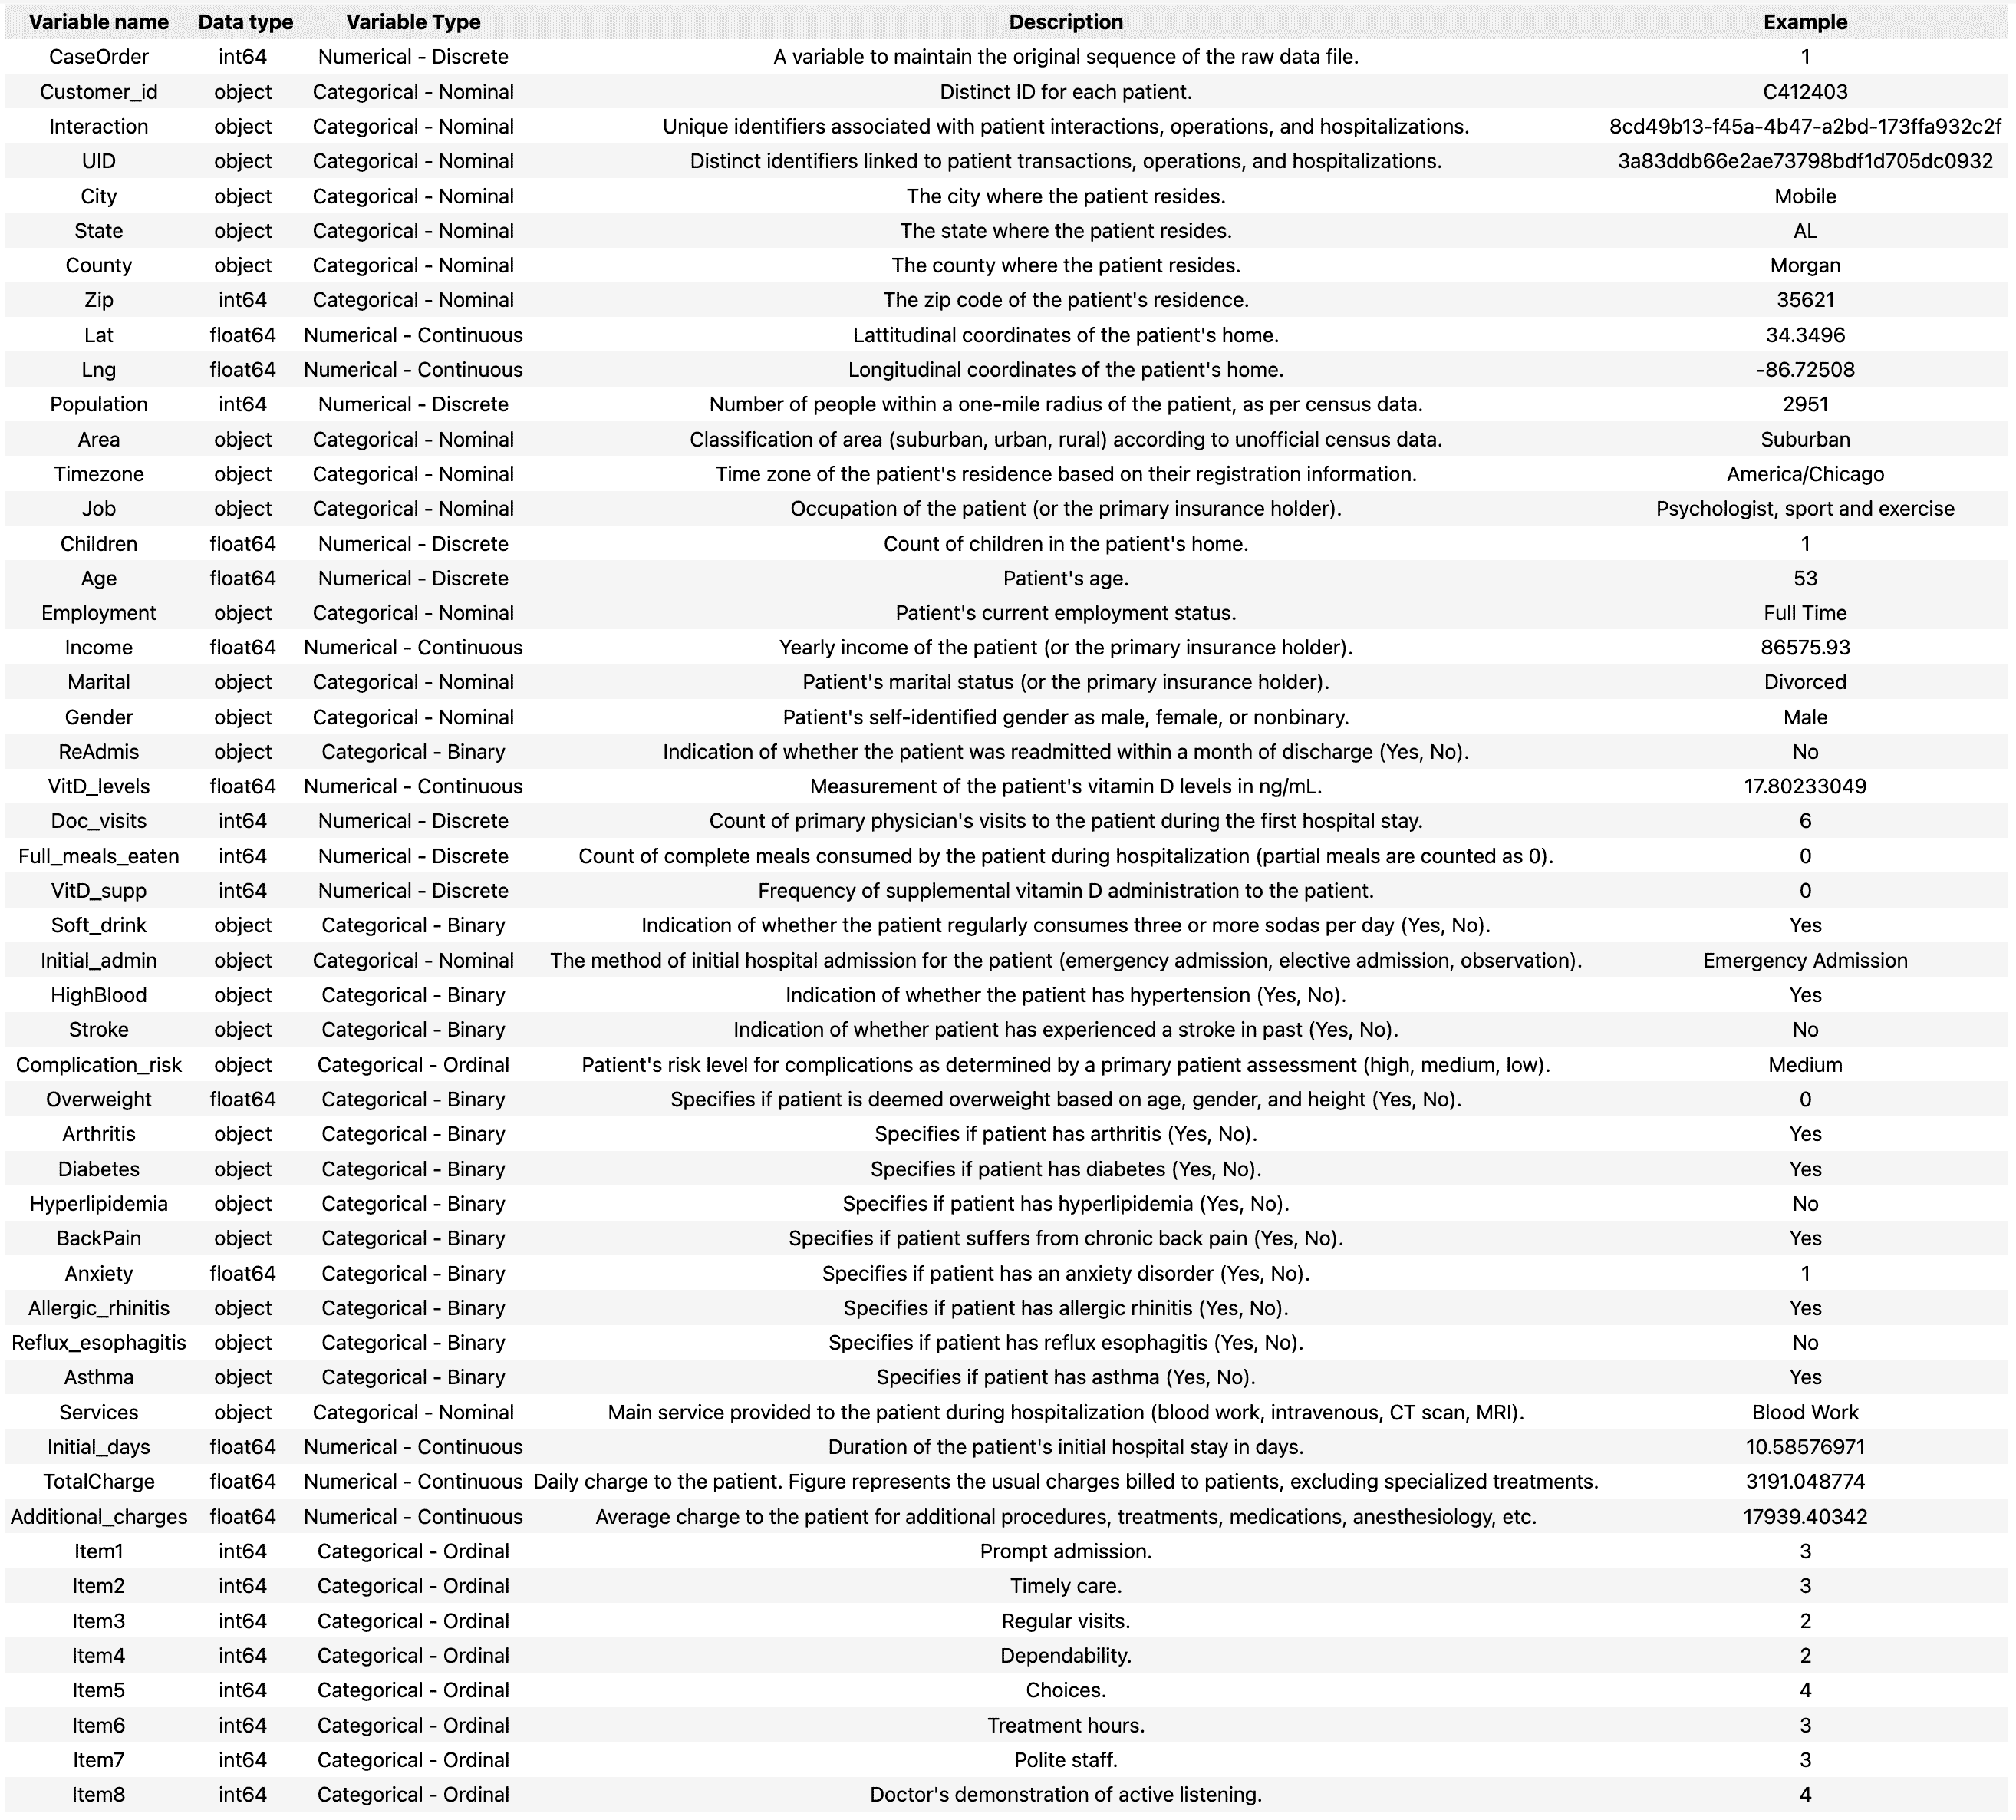

In [60]:
# original data variable description and data types with examples.
from IPython.display import Image
Image(filename='variable_description_208.png')

In [61]:
# import the data and read it into a dataframe, setting the first column `CaseOrder` as the index for consistency.
df_medical = pd.read_csv('D208_templates/medical_clean.csv', index_col=0)

# Display the first five rows of the data
df_medical.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [62]:
# View the last 5 rows of the dataframe
df_medical.tail()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.98086,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.56122,6850.942,8927.642,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.17702,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.66824,7741.690,28507.150,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.12907,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.15418,8276.481,15281.210,3,3,3,4,4,2,3,2
9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.91043,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.35690,7644.483,7781.678,5,5,3,4,4,3,4,3
10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,41524,Urban,America/New_York,Sports development officer,8,70,62682.63,Separated,Female,Yes,18.38862,5,0,1,No,Observation Admission,No,No,Low,Yes,Yes,No,Yes,No,No,Yes,No,No,Blood Work,70.85059,7887.553,11643.190,4,3,3,2,3,6,4,3


In [63]:
# Check the DataFrame information
df_medical.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [64]:
# Check for duplicate rows. 
print(df_medical.duplicated().value_counts())
print('Total Duplicated Rows: ', df_medical.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicated Rows:  0


In [65]:
# Check for null values
df_medical.isnull().sum()

Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1           

In [66]:
# rename columns Item 1 to Item 8 to the appropriate column names. The 'S_' modifier is used to indicate the column is a survey item.
new_col_names={
    'Item1':'S_T_Admission',
    'Item2':'S_T_Treatment', 
    'Item3':'S_T_Visits', 
    'Item4':'S_Reliability', 'Item5':'S_Options', 
    'Item6':'S_Hours_Treatment', 
    'Item7':'S_Staff', 
    'Item8':'S_Active_Listening'}
df_medical.rename(columns=new_col_names, inplace=True)
df_medical.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability',
       'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening'],
      dtype='object')

In [67]:
# combine the data types and unique values count into a DataFrame easy reference and comparison
data_types = df_medical.dtypes
unique_values = df_medical.nunique()
comparison_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})
comparison_df.sort_values(by='Unique Values', ascending=False)

,Data Type,Unique Values
Customer_id,object,10000
UID,object,10000
Interaction,object,10000
Initial_days,float64,9997
TotalCharge,float64,9997
Income,float64,9993
VitD_levels,float64,9976
Additional_charges,float64,9418
Lng,float64,8725
Zip,int64,8612


# Cardinality and Data Type Summary of Variables

## Numerical Variables
- `Income`: 9993 unique values (float64)
- `VitD_levels`: 9976 unique values (float64)
- `Initial_days`: 9997 unique values (float64)
- `TotalCharge`: 9997 unique values (float64)
- `Additional_charges`: 9418 unique values (float64)
- `Population`: 5951 unique values (int64)
- `Children`: 11 unique values (int64)
- `Age`: 72 unique values (int64)
- `Doc_visits`: 9 unique values (int64)
- `Full_meals_eaten`: 8 unique values (int64)
- `vitD_supp`: 6 unique values (int64)
- `Lat`: 8588 unique values (float64)
- `Lng`: 8725 unique values (float64)

## Ordinal Variables (Categorical)
- `S_T_Admission`: 8 unique values (int64)
- `S_T_Treatment`: 7 unique values (int64)
- `S_T_Visits`: 8 unique values (int64)
- `S_Reliability`: 7 unique values (int64)
- `S_Options`: 7 unique values (int64)
- `S_Hours_Treatment`: 7 unique values (int64)
- `S_Staff`: 7 unique values (int64)
- `S_Active_Listening`: 7 unique values (int64)

## Nominal Variables (Categorical)
- `Customer_id`: 10000 unique values (object)
- `Interaction`: 10000 unique values (object)
- `UID`: 10000 unique values (object)
- `City`: 6072 unique values (object)
- `State`: 52 unique values (object)
- `County`: 1607 unique values (object)
- `Zip`: 8612 unique values (int64)
- `Area`: 3 unique values (object)
- `TimeZone`: 26 unique values (object)
- `Job`: 639 unique values (object)
- `Marital`: 5 unique values (object)
- `Gender`: 3 unique values (object)
- `ReAdmis`: 2 unique values (object)
- `Soft_drink`: 2 unique values (object)
- `Initial_admin`: 3 unique values (object)
- `HighBlood`: 2 unique values (object)
- `Stroke`: 2 unique values (object)
- `Complication_risk`: 3 unique values (object)
- `Overweight`: 2 unique values (object)
- `Arthritis`: 2 unique values (object)
- `Diabetes`: 2 unique values (object)
- `Hyperlipidemia`: 2 unique values (object)
- `BackPain`: 2 unique values (object)
- `Anxiety`: 2 unique values (object)
- `Allergic_rhinitis`: 2 unique values (object)
- `Reflux_esophagitis`: 2 unique values (object)
- `Asthma`: 2 unique values (object)
- `Services`: 4 unique values (object)

**Given the nature of the data, there are several variables that will be excluded from the analysis. Here is a brief summary of the variables that will be excluded and the rationale for their exclusion:**

### Current Strategy Overview:
1. **Broad Inclusion**: Start with a wide array of variables to capture potential influences on `Initial_days`, informed by my domain knowledge.
2. **Build Initial Model**: Use this extensive dataset to identify significant predictors.
3. **Analyze & Refine**: Eliminate non-contributing or highly correlated variables based on initial model insights.
4. **Develop Reduced Model**: Focus on key variables for a streamlined, effective model.

### Variables Eliminated:
*Note: I am a former health care professional who has worked in several hospitals and have had extensive hospital stays as a patient. While I am not an expert on this particular data, I do have some domain knowledge and this domain knowledge informs my decision making here.*
- **TotalCharge & Additional Charges**: Possible high correlation and generally a result of `Initial_days` not a cause of. Patients and staff often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depends on patient and services that without context ths variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for targeted occupational study.
- **Services**: All very common in diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion. 
- **Soft_drink**: Poorly defined as soft drink can mean anything from uncaffinated carbonated water to a caffinated sugary soda.


In [68]:
# create reduced dataframe with only the columns  for the analysis
colms_to_drop = ['TotalCharge', 'Services', 'Soft_drink', 'Additional_charges', 'Lat', 'Full_meals_eaten', 'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Job', 'Population']

df_reduced = df_medical.drop(colms_to_drop, axis=1)

# display the dataframe in full
pd.set_option('display.max_columns', None)
df_reduced.head().transpose()

CaseOrder,1,2,3,4,5
Area,Suburban,Urban,Suburban,Suburban,Rural
Children,1,3,3,0,1
Age,53,51,53,78,22
Income,86575.93,46805.99,14370.14,39741.49,1209.56
Marital,Divorced,Married,Widowed,Married,Widowed
Gender,Male,Female,Female,Male,Female
ReAdmis,No,No,No,No,No
VitD_levels,19.141466,18.940352,18.057507,16.576858,17.439069
Doc_visits,6,4,4,4,5
vitD_supp,0,1,0,0,2


In [69]:
# Summary Stats For numeric variables
selected_columns = df_reduced[['Age', 'Income', 'Children', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days']].copy()
selected_columns.describe()

,Age,Income,Children,VitD_levels,Doc_visits,vitD_supp,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,2.097200,17.964262,5.012200,0.398900,34.455299
std,20.638538,28521.153293,2.163659,2.017231,1.045734,0.628505,26.309341
min,18.000000,154.080000,0.000000,9.806483,1.000000,0.000000,1.001981
25%,36.000000,19598.775000,0.000000,16.626439,4.000000,0.000000,7.896215
50%,53.000000,33768.420000,1.000000,17.951122,5.000000,0.000000,35.836244
75%,71.000000,54296.402500,3.000000,19.347963,6.000000,1.000000,61.161020
max,89.000000,207249.100000,10.000000,26.394449,9.000000,5.000000,71.981490


### Initial Takeaways:

- **Age**: Averages 53 years, ranging from 18 to 89, with a diverse age profile.
- **Income**: Averages $40,490, with wide variation (154 to 207249), indicating economic diversity.
- **Children**: Averages 2 children with a similar median, with a range of 0 to 10.
- **VitD_levels**: Averages 17.96, mostly within a narrow range (9.81 to 26.39), suggesting more consistent levels across patients.
- **Doc_visits**: Averages 5 visits, indicating a similar frequency of medical consultations.
- **vitD_supp**: Averages less than 0.5 supplements, with low intake common among patients.

- **Categorical** nominal and ordinal variables are not included here and will include a separate summary of proportions along wit univariate and bivariate visualizations.
- **Initial_days**: Our dependent (target) variable will be fully summarize and visualized below



# Rounding Justification. 
-    Rounding 'Initial_days' from 8 decimal places to 2significantly reduces the number of unique values, which can simplify analyses and visualizations by reducing the granularity of the data. Precision beyond 2 decimal places does not add meaningful information for the analysis. In many practical scenarios, especially related to days, a precision of 2 decimal places is sufficient to capture relevant variations without unnecessarily complicating the dataset.  In healthcare data, for instance, it's unlikely that fractions of a day to eight decimal places would impact decisions or care outcomes.

- Similarly, rounding 'Income' to whole numbers, and 'VitD_levels' to 2 decimal places seems appropriate in this context.

In [70]:
# round 'Initial_days' and 'VitD_levels' to 2 decimal places
df_reduced = df_reduced.round({'VitD_levels': 2})
df_reduced = df_reduced.round({'Initial_days': 2})

# round 'Income' to 0 decimal places by converting to integer
df_reduced = df_reduced.astype({'Income': 'int64'})

# fisplay the dataframe with the rounded values
df_reduced[['Initial_days', 'VitD_levels', 'Income']].head()

,Initial_days,VitD_levels,Income
CaseOrder,,,
1,10.59,19.14,86575
2,15.13,18.94,46805
3,4.77,18.06,14370
4,1.71,16.58,39741
5,1.25,17.44,1209


In [71]:
# Export to csv and to save results so far and to reduce memory consumption.
df_reduced.to_csv('df_reduced.csv', index='CaseOrder')

---------------------------

In [72]:
# Load the data
df = pd.read_csv('df_reduced.csv', index_col=0)

-------------------------------------


# C3.  Visualizations 

Below are Univariate and Bivariate Visualizations for independent variables showing their relationship with the dependent variable `Initial_days`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. The web article by RealPython education site and Seaborn own documentation will be used as a guide for the visualizations. 

# Univaraite Visualizations

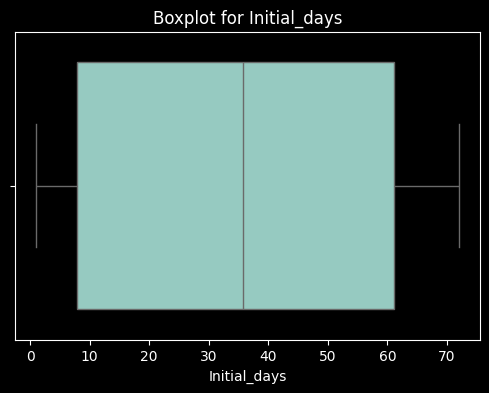

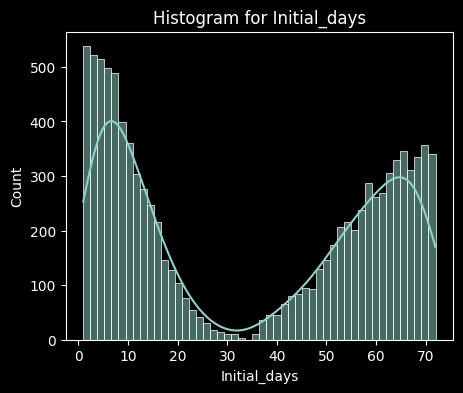

count    10000.000000
mean        34.455284
std         26.309382
min          1.000000
25%          7.900000
50%         35.840000
75%         61.162500
max         71.980000
Name: Initial_days, dtype: float64

In [73]:
# Boxplot for 'Initial_days'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='Initial_days', kde=True, bins=50)
plt.title('Histogram for Initial_days')
plt.show()

df['Initial_days'].describe()

- **Boxplot Observations**: The median appears to be above the mid-30s, suggesting that roughly half of the patients have shorter initial stays and the other half have longer. There are no visible outliers, indicating no extreme values or anomalies that fall outside the typical range. The interfertile range shows that the middle 50% of the data spans a rather large range, suggesting a concentration of data within this segment.

- **Histogram Observations**: The distribution is bimodal, with two peaks: one just under a few days and another around 70 days. This suggests there are two groups of patients with different typical hospital stay lengths. The histogram indicates that shorter initial stays are more common than longer stays, with a significant drop-off in frequency as the number of days increases towards the middle values. The spread between the two modes shows that there is variability in the data, not concentrated around a single central value. Understanding the reasons behind this bimodal distribution may require further investigation into the factors affecting hospital stay lengths. This distribution is important to kee in mind when interpreting the results of the regression analysis, as it may influence the model's predictive accuracy and the significance of the predictors.


**Summary**: Statistical measures for `Initial_days` across all patients in the dataset, including:

- **Count**: 10,000 observations. This represents the number of patients included in the analysis.
- **Mean**: Approximately 34 days. On average, patients spend a little over a month in the hospital.
- **Standard Deviation**: About 26 days. This indicates a wide variation in the length of hospital stays among patients; while some patients have short stays, others have significantly longer stays.
- **Minimum**: Just over 1 day. This shows that some patients are discharged almost immediately after admission.
- **25% (First Quartile)**: About 8 days or less. A quarter of the patients have hospital stays just over a week.
- **Median (50%)**: Approximately 36 days. This is very close to the mean. However, the slight difference between the mean and median indicates a slight skew in the data.
- **75% (Third Quartile)**: About 61 days or less. Most patients are discharged within two months.
- **Maximum**: Nearly 72 days. Indicates that some patients have extended hospital stays.

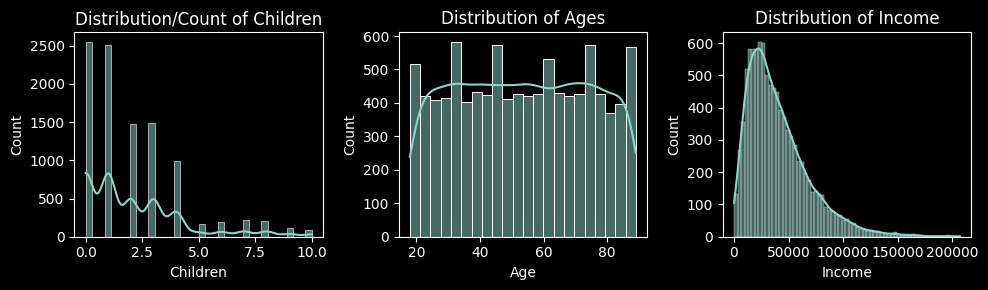

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,2.0972,2.163659,0.0,0.00,1.0,3.00,10.0
Age,10000.0,53.5117,20.638538,18.0,36.00,53.0,71.00,89.0
Income,10000.0,40490.0021,28521.152883,154.0,19598.25,33768.0,54295.75,207249.0


In [74]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of children
sns.histplot(data=df, x='Children', ax=axes[0], kde=True)
axes[0].set_title('Distribution/Count of Children')

# distribution of ages
sns.histplot(data=df, x='Age', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Ages')

# distribution of income
sns.histplot(data=df, x='Income', ax=axes[2], kde=True)
axes[2].set_title('Distribution of Income')

plt.tight_layout()
plt.show()

# summary statistics for the variables
df[['Children', 'Age', 'Income']].describe().transpose()

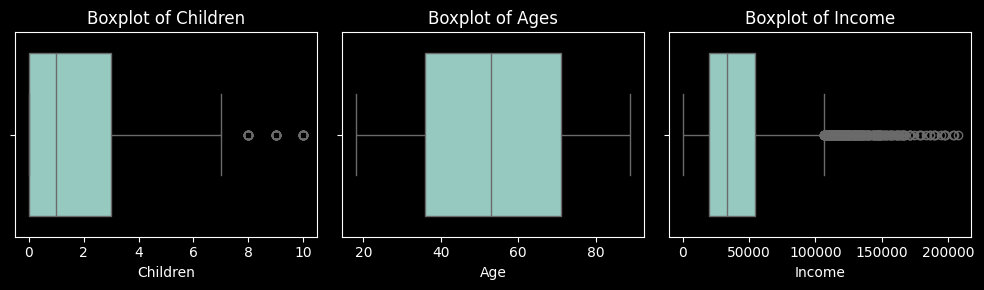

In [75]:
# subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# boxplot of children
sns.boxplot(data=df, x='Children', ax=axes[0])
axes[0].set_title('Boxplot of Children')

# boxplot of ages
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Ages')

# boxplot of income
sns.boxplot(data=df, x='Income', ax=axes[2])
axes[2].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()




- The outliers here will be noted as they may impact the regression model, particularly with OLS regression. For now, we will note them and include as is in the initial model.

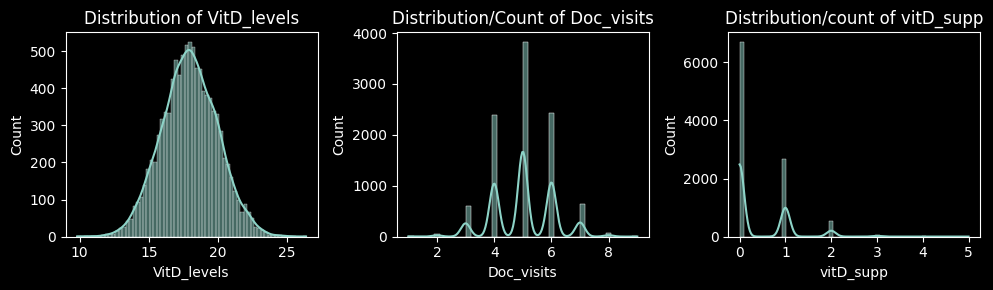

,count,mean,std,min,25%,50%,75%,max
VitD_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
Doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
vitD_supp,10000.0,0.398900,0.628505,0.00,0.0000,0.00,1.00,5.00


In [76]:
# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of VitD_levels
sns.histplot(data=df, x='VitD_levels', ax=axes[0], kde=True)
axes[0].set_title('Distribution of VitD_levels')

# distribution/count of Doc_visits with bigger bins
sns.histplot(data=df, x='Doc_visits', ax=axes[1], kde=True)
axes[1].set_title('Distribution/Count of Doc_visits')

# distribution/count of vitD_supp with bigger bins
sns.histplot(data=df, x='vitD_supp', ax=axes[2], kde=True)
axes[2].set_title('Distribution/count of vitD_supp')

plt.tight_layout()
plt.show()
# descriptive statistics for the variables
df[['VitD_levels', 'Doc_visits', 'vitD_supp']].describe().transpose()

- The `Vitamin D levels` appear normally distributed around a middle value, suggesting that most patients have Vitamin D levels within a standard range, with fewer individuals having very high or very low levels. `Doc_visits` show a pattern with most patientss having 4-6 visits, and the frequency drops for higher numbers of visits. For Vitamin `D supplements`, most patients are not given supplements, which aligns with the distribution of Vitamin D levels.

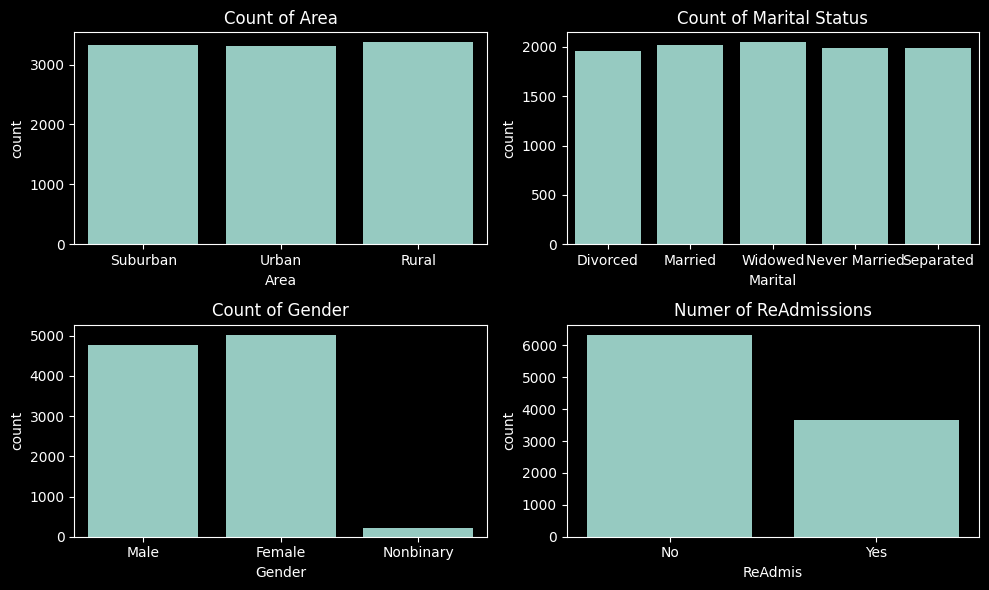

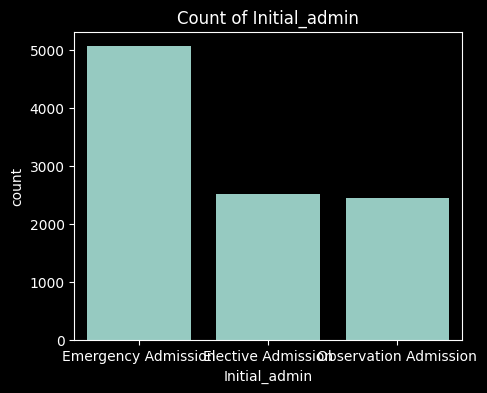

In [77]:
# Create a 2 by 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Area
sns.countplot(data=df, x='Area', ax=axes[0, 0])
axes[0, 0].set_title('Count of Area')

# Marital
sns.countplot(data=df, x='Marital', ax=axes[0, 1])
axes[0, 1].set_title('Count of Marital Status')

# Gender
sns.countplot(data=df, x='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Count of Gender')

# ReAdmis
sns.countplot(data=df, x='ReAdmis', ax=axes[1, 1])
axes[1, 1].set_title('Numer of ReAdmissions')

plt.tight_layout()
plt.show()

# create a countplot for initial_admin
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Initial_admin')
plt.title('Count of Initial_admin')


plt.show()

# Proportion Summary 

`Area`
- Rural: 33.69%
- Urban: 33.03%
- Suburban: 33.28%

`Gender`
- Female: 50.18%
- Male: 47.68%
- Nonbinary: 2.14%

`Marital`
- Widowed: 20.45% 
- Married: 20.23% 
- Separated: 19.87% 
- Never Married: 19.84% 
- Divorced: 19.61%

`ReAdmis`
- No: 63.31%
- Yes: 36.69%

`Initial_admin`
- Emergency: 51.60%
- Elective: 25.04%
- Observation: 24.36%


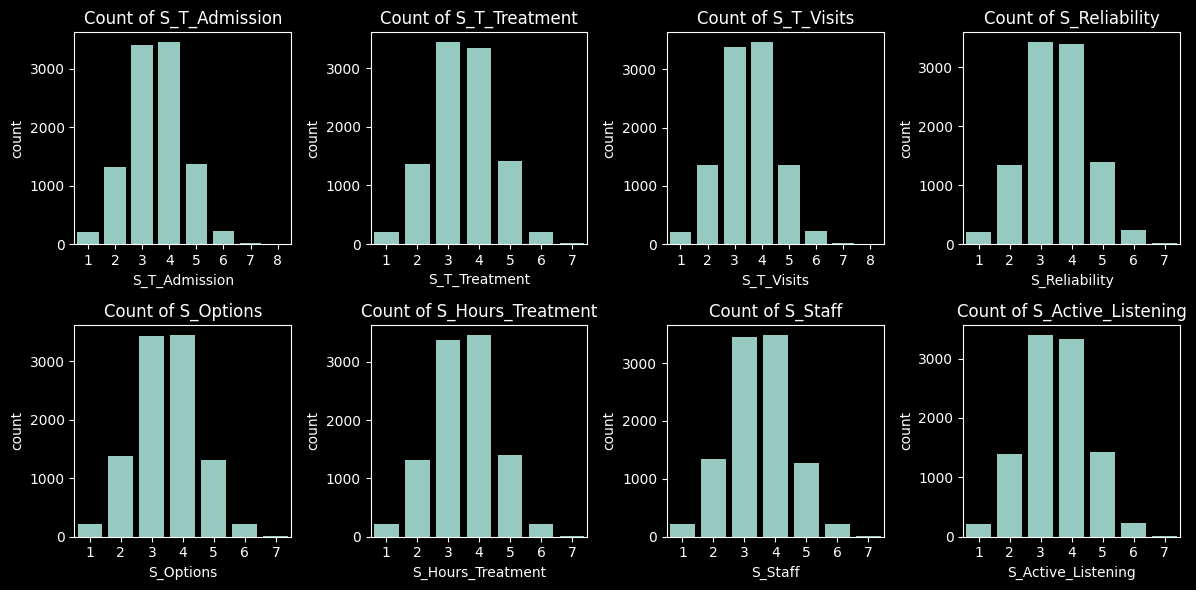

,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening
1,213,213.0,211,207.0,211.0,213.0,215.0,209.0
2,1315,1360.0,1356,1346.0,1380.0,1319.0,1345.0,1391.0
3,3404,3439.0,3379,3422.0,3423.0,3371.0,3456.0,3401.0
4,3455,3351.0,3464,3394.0,3446.0,3464.0,3487.0,3337.0
5,1377,1421.0,1358,1388.0,1308.0,1403.0,1274.0,1429.0
6,225,204.0,220,231.0,219.0,220.0,212.0,221.0
7,10,12.0,11,12.0,13.0,10.0,11.0,12.0
8,1,NaN,1,NaN,NaN,NaN,NaN,NaN


In [78]:
# Survey items
# 2 by 4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# S_T_Admission
sns.countplot(data=df, x='S_T_Admission', ax=axes[0, 0])
axes[0, 0].set_title('Count of S_T_Admission')

# S_T_Treatment
sns.countplot(data=df, x='S_T_Treatment', ax=axes[0, 1])
axes[0, 1].set_title('Count of S_T_Treatment')

# S_T_Visits
sns.countplot(data=df, x='S_T_Visits', ax=axes[0, 2])
axes[0, 2].set_title('Count of S_T_Visits')

# S_Reliability
sns.countplot(data=df, x='S_Reliability', ax=axes[0, 3])
axes[0, 3].set_title('Count of S_Reliability')

# S_Options
sns.countplot(data=df, x='S_Options', ax=axes[1, 0])
axes[1, 0].set_title('Count of S_Options')

# S_Hours_Treatment
sns.countplot(data=df, x='S_Hours_Treatment', ax=axes[1, 1])
axes[1, 1].set_title('Count of S_Hours_Treatment')

# S_Staff
sns.countplot(data=df, x='S_Staff', ax=axes[1, 2])
axes[1, 2].set_title('Count of S_Staff')

# S_Active_Listening
sns.countplot(data=df, x='S_Active_Listening', ax=axes[1, 3])
axes[1, 3].set_title('Count of S_Active_Listening')

plt.tight_layout()
plt.show()

# value counts for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].apply(pd.Series.value_counts)

- Survey responses across various rating scales appear to be fairly evenly distributed among the different survey items. This uniformity could indicate a degree of correlation among the responses to these items. To explore potential patterns, we will utilize pie charts to visualize the distribution of responses and a correlation matrix to quantitatively assess the relationships between the items.

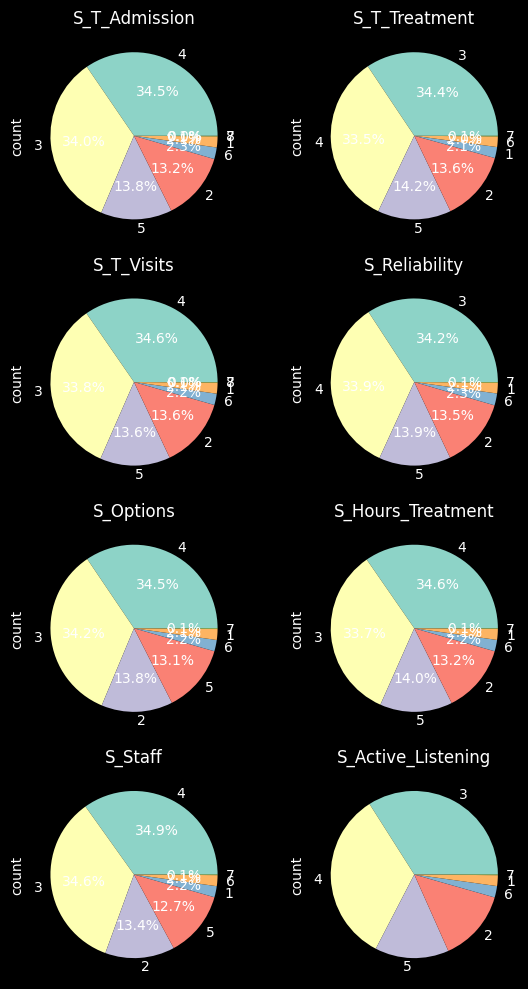

,count,mean,std,min,25%,50%,75%,max
S_T_Admission,10000.0,3.5188,1.031966,1.0,3.0,4.0,4.0,8.0
S_T_Treatment,10000.0,3.5067,1.034825,1.0,3.0,3.0,4.0,7.0
S_T_Visits,10000.0,3.5111,1.032755,1.0,3.0,4.0,4.0,8.0
S_Reliability,10000.0,3.5151,1.036282,1.0,3.0,4.0,4.0,7.0
S_Options,10000.0,3.4969,1.030192,1.0,3.0,3.0,4.0,7.0
S_Hours_Treatment,10000.0,3.5225,1.032376,1.0,3.0,4.0,4.0,7.0
S_Staff,10000.0,3.4940,1.021405,1.0,3.0,3.0,4.0,7.0
S_Active_Listening,10000.0,3.5097,1.042312,1.0,3.0,3.0,4.0,7.0


In [79]:
textprops = {"fontsize":10} 

# 2 by 4 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(6, 10))

# S_T_Admission
df['S_T_Admission'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', textprops=textprops)
axes[0, 0].set_title('S_T_Admission')

# S_T_Treatment
df['S_T_Treatment'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%', textprops=textprops)
axes[0, 1].set_title('S_T_Treatment')

# S_T_Visits
df['S_T_Visits'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%', textprops=textprops)
axes[1, 0].set_title('S_T_Visits')

# S_Reliability
df['S_Reliability'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%', textprops=textprops)
axes[1, 1].set_title('S_Reliability')

# S_Options
df['S_Options'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%', textprops=textprops)
axes[2, 0].set_title('S_Options')

# S_Hours_Treatment
df['S_Hours_Treatment'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%', textprops=textprops)
axes[2, 1].set_title('S_Hours_Treatment')

# S_Staff
df['S_Staff'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%', textprops=textprops)
axes[3, 0].set_title('S_Staff')

# S_Active_Listening
df['S_Active_Listening'].value_counts().plot.pie(ax=axes[3, 1], textprops=textprops)
axes[3, 1].set_title('S_Active_Listening')
plt.tight_layout()
plt.show()

# display descriptive statistics for the survey items
df[['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']].describe().transpose()

- The pie charts and summary show similar pattern across with some survey responses having almost identical proportions. This could indicate a lack of variability in the responses, which may impact the predictive power of these variables in the regression model. 

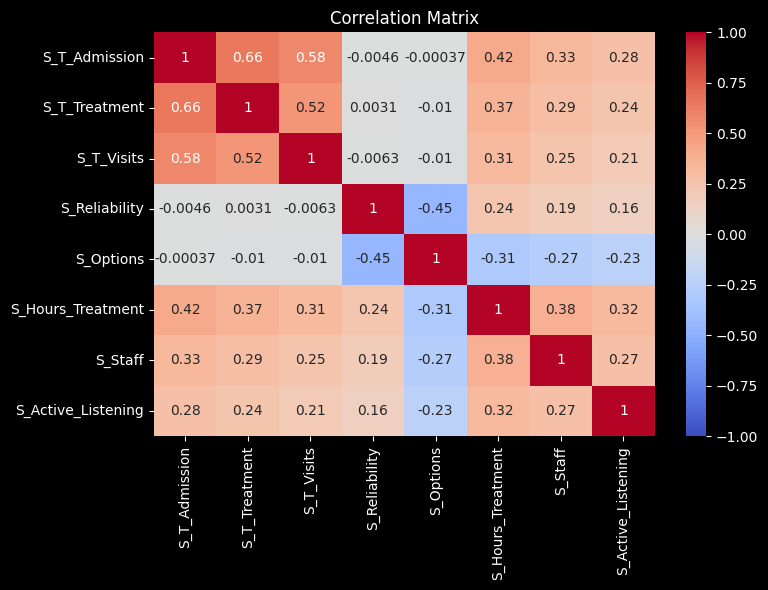

In [80]:
# Create a correlation matrix
#  the columns correlation matrix
cols = ['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability',
        'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']

corr_matrix = df[cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



- The correlation matrix shows that there may indeed be correlation amongst the different survey items. This could introduce multicolinarity into the regression model.

- These pairs of items have correlation coefficients very close to zero, suggesting that there is little to no linear relationship between them. When selecting variables for a regression model, these items might be preferred as they are less likely to introduce multicollinearity issues. We will note this during the initial model building phase. And check the VIF scores to confirm.

- S_T_Admission and S_Reliability: -0.0046
- S_T_Visits and S_Reliability: -0.0063
- S_T_Admission and S_Options: -0.0037
- S_T_Treatment and S_Options: -0.01
- S_T_Visits and S_Options: -0.01


# Bivariate Visualizations

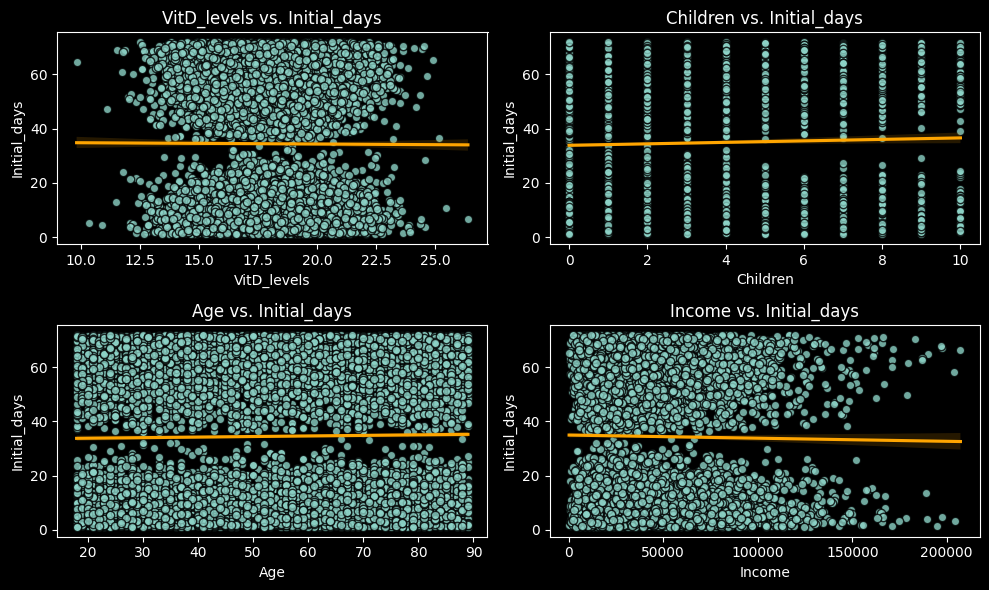

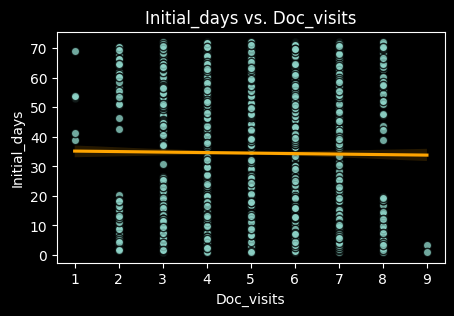

In [81]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(10, 6))

#  vitD_levels vs. Initial_days
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='VitD_levels', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('VitD_levels vs. Initial_days')

#Children vs. Initial_days
plt.subplot(2, 2, 2)
sns.regplot(data=df, x='Children', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Children vs. Initial_days')

# Aage vs. Initial_days
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='Age', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Age vs. Initial_days')

# income vs. Initial_days
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='Income', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Income vs. Initial_days')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 3))
sns.regplot(data=df, x='Doc_visits', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Initial_days vs. Doc_visits')
plt.show()

 - `Vitamin D` levels and initial days don't seem to have a clear pattern, with no obvious relationship. When it comes to `children` ther is no distinct trend, suggesting the number of children doesn't linearly affect the length of hospital stay. `Age` shows a spread of data across the age range without a strong trend. For `income`, there's more variability at higher income levels, but there is no clear pattern suggesting a strong relationship. Overall, these plots suggest that individually, these variables do not have a simple linear relationship with the number of initial days spent in the hospital. However, together they might. Income might benifit from a transformation to better understand the relationship. `Doc_visits` suggest that there is no strong, straightforward relationship between the number of doctor visits and the average initial days, as increased doctor visits do not correlate with either a significant increase or decrease in the initial days. The bimodal distrubution of Initial_days may be why one sees distributions grouped above and below the lines.



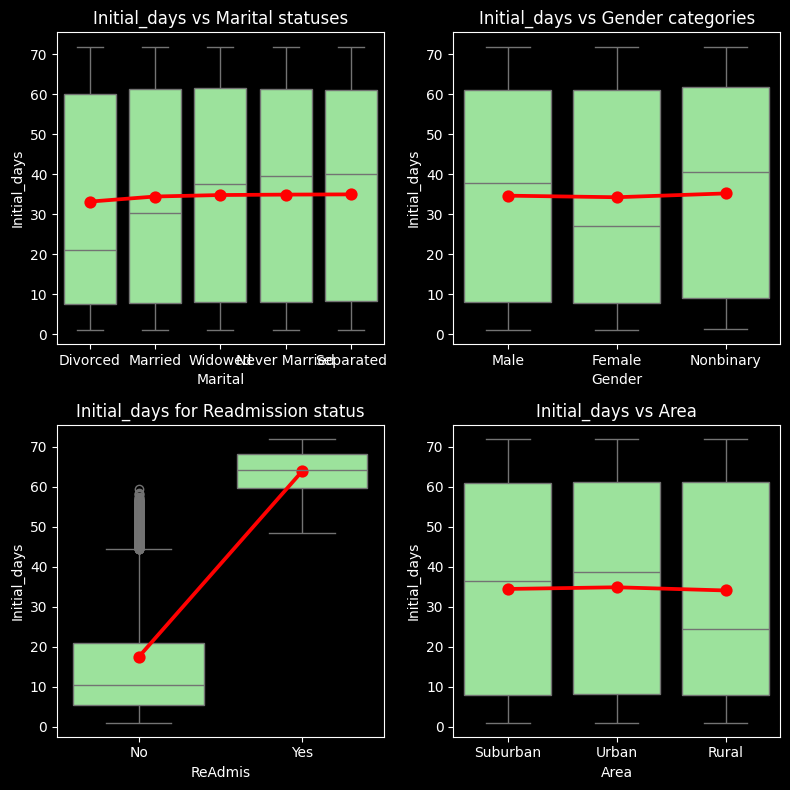

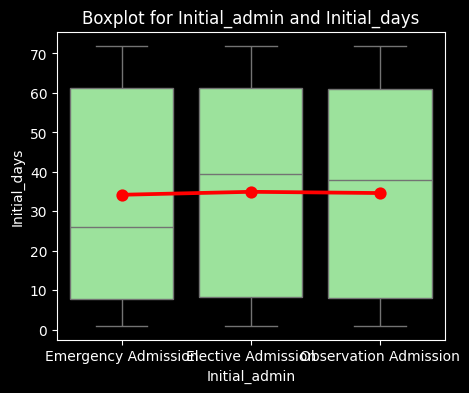

In [82]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(8, 8))

# Marital
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Marital', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='Marital', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Initial_days vs Marital statuses')

# Gender
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Gender', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='Gender', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Initial_days vs Gender categories')

# Initial_days for Readmission status
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='ReAdmis', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='ReAdmis', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Initial_days for Readmission status')

# Initial_days vs Area categories
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Area', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='Area', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Initial_days vs Area')

plt.tight_layout()
plt.show()

# boxplot with Initial_admin and Initial_days
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Initial_admin', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='Initial_admin', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Boxplot for Initial_admin and Initial_days')
plt.show()


- The `Marital` statuses plot shows that seperated and single patients tend to have the highest number of days in the hospital, and that divorced and married tended to spend fewer days. The signifigance of this is unknown. The `Gender` categories show slightly higher median Initial_days for males and non binary patients and a notably lower median for females compared to males. The `Readmission` plot is very interesting. It shows a significantly higher median and and grouping of `Initial_days` for readmitted patients compared to non-readmitted patients, with several outliers showing long stays among readmitted patients. Curiously, this appears to also show two distinct groups. This is noted. Lastly, the Area plot demonstrates a slightly lower median for urban areas, suggesting hospital time is less for urban patients compared to rural and suburban patients. Interstingly, `Initial_admin` shows a higher median for elective admissions compared to emergency admissions.

- *The red lines in the boxplots show the mean values for each group. This is more about practice with visualizations than anything and to quickly compare the mean to the median. If the mean is far away from the median, could suggests that the distribution of `Initial_days` within the category is skewed, possibly indicating the presence of outliers or a non-normal distribution. However, the skewness alone does not directly tell one that it is a poor candidate for the model. Additionally, the order of the arrangement of categories on the x-axis of can influence the interpretation and direction of the mean line trend. If the categories are arranged in a certain order, the mean line might appear to trend up, down, or remain flat. So it's important to not draw those kinds of conclusions from the mean line alone.*

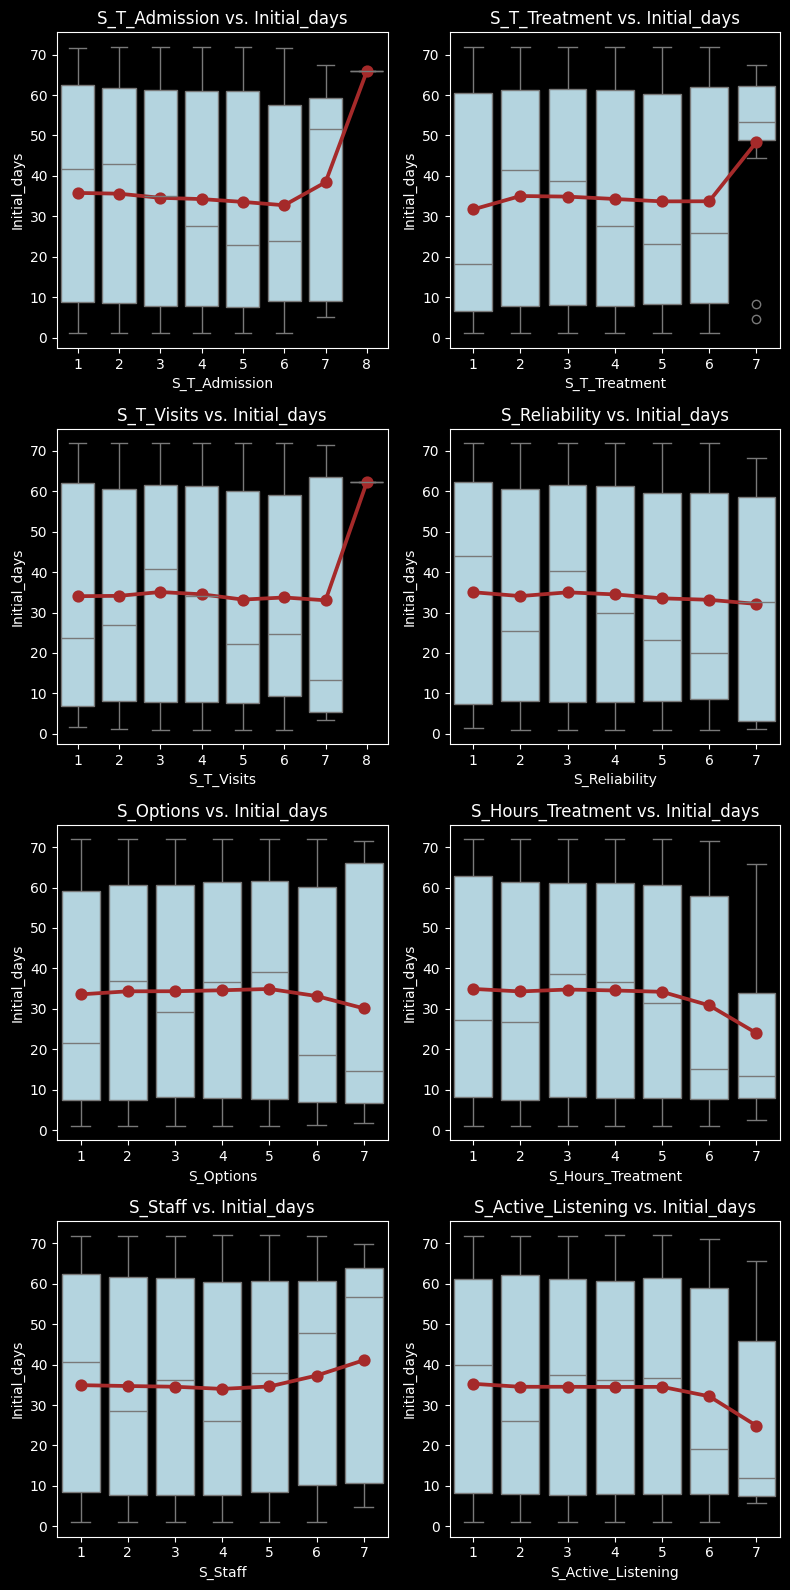

In [83]:
# 4 by 2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(8, 16))

# S_T_Admission
sns.boxplot(data=df, x='S_T_Admission', y='Initial_days', ax=axes[0, 0], color='lightblue')
sns.pointplot(data=df, x='S_T_Admission', y='Initial_days', ax=axes[0, 0], color='brown', estimator=np.mean, errorbar=None)
axes[0, 0].set_title('S_T_Admission vs. Initial_days')

# S_T_Treatment
sns.boxplot(data=df, x='S_T_Treatment', y='Initial_days', ax=axes[0, 1], color='lightblue')
sns.pointplot(data=df, x='S_T_Treatment', y='Initial_days', ax=axes[0, 1], color='brown', estimator=np.mean, errorbar=None)
axes[0, 1].set_title('S_T_Treatment vs. Initial_days')

# S_T_Visits
sns.boxplot(data=df, x='S_T_Visits', y='Initial_days', ax=axes[1, 0], color='lightblue')
sns.pointplot(data=df, x='S_T_Visits', y='Initial_days', ax=axes[1, 0], color='brown', estimator=np.mean, errorbar=None)
axes[1, 0].set_title('S_T_Visits vs. Initial_days')

# S_Reliability
sns.boxplot(data=df, x='S_Reliability', y='Initial_days', ax=axes[1, 1], color='lightblue')
sns.pointplot(data=df, x='S_Reliability', y='Initial_days', ax=axes[1, 1], color='brown', estimator=np.mean, errorbar=None)
axes[1, 1].set_title('S_Reliability vs. Initial_days')

# S_Options
sns.boxplot(data=df, x='S_Options', y='Initial_days', ax=axes[2, 0], color='lightblue')
sns.pointplot(data=df, x='S_Options', y='Initial_days', ax=axes[2, 0], color='brown', estimator=np.mean, errorbar=None)
axes[2, 0].set_title('S_Options vs. Initial_days')

# S_Hours_Treatment
sns.boxplot(data=df, x='S_Hours_Treatment', y='Initial_days', ax=axes[2, 1], color='lightblue')
sns.pointplot(data=df, x='S_Hours_Treatment', y='Initial_days', ax=axes[2, 1], color='brown', estimator=np.mean, errorbar=None)
axes[2, 1].set_title('S_Hours_Treatment vs. Initial_days')

# S_Staff
sns.boxplot(data=df, x='S_Staff', y='Initial_days', ax=axes[3, 0], color='lightblue')
sns.pointplot(data=df, x='S_Staff', y='Initial_days', ax=axes[3, 0], color='brown', estimator=np.mean, errorbar=None)
axes[3, 0].set_title('S_Staff vs. Initial_days')

# S_Active_Listening
sns.boxplot(data=df, x='S_Active_Listening', y='Initial_days', ax=axes[3, 1], color='lightblue')
sns.pointplot(data=df, x='S_Active_Listening', y='Initial_days', ax=axes[3, 1], color='brown', estimator=np.mean, errorbar=None)
axes[3, 1].set_title('S_Active_Listening vs. Initial_days')

plt.tight_layout()
plt.show()


- Seeing these survey results in a bivariate plot with Initial_days is interesting in the variation in the median Initial_days across the different survey responses. Admittedly, I am a little unsure about how to interpret this. The initial thinking is that there is some interesting insights to gleam from this. Perhaps this suggests that the survey responses may have some predictive power in determining the length of a patient's hospital stay.

- It is interesting to see the relationship between the highest survey responses and the length of hospital stay though, where it the highest rating in most categorys is correlated with the highest and lowest hospital stay lengths. This may be insightful to hospitals in terms of patient care and satisfaction.

----------------------------------------------------------------------

In [84]:
df = pd.read_csv('df_reduced.csv', index_col=0)

# C4 Data Transformation
## Reexpression of categorical variables

- Since the dataset contains several nominal categorical variables, it is essential to re-express these variables in a numerical format to include them in the regression model. This process is known as one-hot encoding, and it involves re-expressing categorical variables as binary variables, a format the regression model can use, by creating dummy variables for each category within a categorical variable. The Pandas library provides a method for performing this transformation using the `pd.get_dummies()` function. This function creates a new binary column for each category in a categorical variable,; 1 indicating the presence of that category and 0 indicating the absence. The original categorical variable is then dropped from the dataset to avoid multicollinearity issues in the regression model.

- Ordinal and binary variables *(Yes/No->1/0)* will be re-expressed as well using pythons `replace` method. 

- (`replace` is apparently being depreciated: "*FutureWarning: Downcasting behavior in replace is deprecated and will be removed in a future version. To retain the old behavior, explicitly call result.infer_objects(copy=False). To opt-in to the future behavior, set pd.set_option('future.no_silent_downcasting, True)`df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})*")

In [85]:
# select and show values counts for binary variables to compare berfore and after reexpression
binary_vars = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]
for col in binary_vars:
    print(df[col].value_counts())


ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64
HighBlood
No     5910
Yes    4090
Name: count, dtype: int64
Stroke
No     8007
Yes    1993
Name: count, dtype: int64
Overweight
Yes    7094
No     2906
Name: count, dtype: int64
Arthritis
No     6426
Yes    3574
Name: count, dtype: int64
Diabetes
No     7262
Yes    2738
Name: count, dtype: int64
Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64
BackPain
No     5886
Yes    4114
Name: count, dtype: int64
Anxiety
No     6785
Yes    3215
Name: count, dtype: int64
Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64
Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64
Asthma
No     7107
Yes    2893
Name: count, dtype: int64


In [86]:
# re-expression of binary variables
df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})

# check the unique values for the binary variables
for col in binary_vars:
    print(df[col].value_counts())

ReAdmis
0    6331
1    3669
Name: count, dtype: int64
HighBlood
0    5910
1    4090
Name: count, dtype: int64
Stroke
0    8007
1    1993
Name: count, dtype: int64
Overweight
1    7094
0    2906
Name: count, dtype: int64
Arthritis
0    6426
1    3574
Name: count, dtype: int64
Diabetes
0    7262
1    2738
Name: count, dtype: int64
Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64
BackPain
0    5886
1    4114
Name: count, dtype: int64
Anxiety
0    6785
1    3215
Name: count, dtype: int64
Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64
Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64
Asthma
0    7107
1    2893
Name: count, dtype: int64


C:\Users\hinde\AppData\Local\Temp\ipykernel_12188\2645779669.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})


- The data dictionary states: "The (Survey) variables represent responses to an eight question survey asking customers to rate the importance of various factors/surfaces on a scale of 1 to 8 (1 most important, 8 least important)" Generally 1 is low and 8 is high in terms of importance and having 1 as most important and 8 as least important is not intuitive, and has caused this analyst confusion. Therefore, we will reverse the scale of survey variables so that 1 is the lowest and 8 is the highest in terms of importance. This will make the interpretation more intuitive in the regression analysis.

In [87]:
# Collect values and compare before and after
survey_vars = ['S_T_Admission', 'S_T_Treatment', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening']
df[survey_vars].head()


,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening
CaseOrder,,,,,,,,
1,3,3,2,2,4,3,3,4
2,3,4,3,4,4,4,3,3
3,2,4,4,4,3,4,3,3
4,3,5,5,3,4,5,5,5
5,2,1,3,3,5,3,4,3


In [88]:
# reverse the scale of survey variables so that 1 is the lowest and 8 is the highest in terms of importance. and after the change.
df[survey_vars] = df[survey_vars].replace({1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1})

df[survey_vars].head()

,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening
CaseOrder,,,,,,,,
1,6,6,7,7,5,6,6,5
2,6,5,6,5,5,5,6,6
3,7,5,5,5,6,5,6,6
4,6,4,4,6,5,4,4,4
5,7,8,6,6,4,6,5,6


In [89]:
# reexpress `complication_risk` from categorical variable to numerical variable where 1 is the lowest and 3 is the highest in terms of risk.
# Check values before and after
print(df['Complication_risk'].value_counts())
df['Complication_risk'] = df['Complication_risk'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64


C:\Users\hinde\AppData\Local\Temp\ipykernel_12188\1705884698.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Complication_risk'] = df['Complication_risk'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)


Complication_risk
2    4517
3    3358
1    2125
Name: count, dtype: int64

In [90]:
#to csv to save progress so far.
df.to_csv('df_for_one_hot.csv', index='CaseOrder')

In [91]:
#read the csv
df = pd.read_csv('df_for_one_hot.csv', index_col=0)
df.head().transpose()

CaseOrder,1,2,3,4,5
Area,Suburban,Urban,Suburban,Suburban,Rural
Children,1,3,3,0,1
Age,53,51,53,78,22
Income,86575,46805,14370,39741,1209
Marital,Divorced,Married,Widowed,Married,Widowed
Gender,Male,Female,Female,Male,Female
ReAdmis,0,0,0,0,0
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6,4,4,4,5
vitD_supp,0,1,0,0,2


# One hot encoding


In [92]:
# Using get_dummies to convert nominal variables to 1 and 0 for one-hot encoding and drop the first column to avoid multicollinearity.
nominal_vars = ['Area', 'Marital', 'Gender', 'Initial_admin']
df_encoded = pd.get_dummies(df, columns=nominal_vars, dtype=int, drop_first=True)

In [93]:
# Show the head of the encoded DataFrame
pd.set_option('display.max_columns', None)
df_encoded

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,0,1,1,0,1,1,1,0,1,10.59,6,6,7,7,5,6,6,5,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,1,0,0,0,0,0,0,1,0,15.13,6,5,6,5,5,5,6,6,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,1,0,1,0,0,0,0,0,0,4.77,7,5,5,5,6,5,6,6,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,0,1,0,0,0,0,0,1,1,1.71,6,4,4,6,5,4,4,4,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,0,0,0,1,0,0,1,0,0,1.25,7,8,6,6,4,6,5,6,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,0,16.98,4,1,1,0,2,0,0,0,0,0,1,0,1,0,51.56,6,7,7,6,5,6,5,7,0,1,0,0,0,1,1,0,1,0
9997,4,87,14983,1,18.18,5,0,1,0,2,1,1,1,0,0,0,0,0,1,68.67,6,6,5,7,4,6,5,5,0,1,0,0,0,1,1,0,0,0
9998,3,45,65917,1,17.13,4,0,1,0,3,1,0,0,0,0,1,1,0,0,70.15,6,6,6,5,5,7,6,7,0,0,0,0,1,0,0,0,0,0


- Noting the shape to be sure extra columns drop: 38 columns

In [94]:
#FINAL CLEAN TRANSFORMED CSV
df_encoded.to_csv('medical_transformed.csv', index='CaseOrder')

--------------------

In [95]:
df = pd.read_csv('medical_transformed.csv', index_col=0)
df.head()

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,S_T_Admission,S_T_Treatment,S_T_Visits,S_Reliability,S_Options,S_Hours_Treatment,S_Staff,S_Active_Listening,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,53,86575,0,19.14,6,0,1,0,2,0,1,1,0,1,1,1,0,1,10.59,6,6,7,7,5,6,6,5,1,0,0,0,0,0,1,0,1,0
2,3,51,46805,0,18.94,4,1,1,0,3,1,0,0,0,0,0,0,1,0,15.13,6,5,6,5,5,5,6,6,0,1,1,0,0,0,0,0,1,0
3,3,53,14370,0,18.06,4,0,1,0,2,1,0,1,0,0,0,0,0,0,4.77,7,5,5,5,6,5,6,6,1,0,0,0,0,1,0,0,0,0
4,0,78,39741,0,16.58,4,0,0,1,2,0,1,0,0,0,0,0,1,1,1.71,6,4,4,6,5,4,4,4,1,0,1,0,0,0,1,0,0,0
5,1,22,1209,0,17.44,5,2,0,0,1,0,0,0,1,0,0,1,0,0,1.25,7,8,6,6,4,6,5,6,0,0,0,0,0,1,0,0,0,0


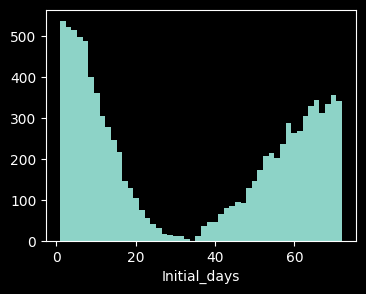

In [96]:
# create a histogram of the initial_days column
plt.figure(figsize=(4, 3))
plt.hist(df['Initial_days'], bins=50)
plt.xlabel('Initial_days')
plt.show()

--------------------

# Part IV: Model Comparison and Analysis

## D. Compare an initial and a reduced linear regression model by doing the following:

### **D1. Construct an initial multiple linear regression model from all independent variables that were identified in part C2:**

In [97]:
# muultiple regression model using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables

X = df.drop('Initial_days', axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()

model_summary
# create a csv file with the model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     714.1
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:57:30   Log-Likelihood:                -40411.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9962   BIC:                         8.117e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  19.4602      2.467      7.889      0.000      14.625      24.295
Children                                0.0401      0.064      0.628      0.530      -0.085       0.165
Age                                     0.0035      0.007      0.521      0.603      -0.010       0.017
Income                              -3.442e-06   4.84e-06     -0.710      0.477   -1.29e-05    6.06e-06
ReAdmis                                46.4505      0.287    162.028      0.000      45.889      47.012
VitD_levels                            -0.0775      0.069     -1.130      0.259      -0.212       0.057
Doc_visits                             -0.1714      0.132     -1.297      0.195      -0.430       0.088
vitD_supp                               0.2924      0.220      1.331      0.183      -0.138       0.723
HighBlood                              -0.4475      0.281     -1.592      0.111      -0.998       0.103
Stroke                                 -0.2008      0.346     -0.581      0.561      -0.878       0.477
Complication_risk                      -0.3944      0.189     -2.084      0.037      -0.765      -0.023
Overweight                             -0.2090      0.304     -0.687      0.492      -0.805       0.387
Arthritis                               0.6649      0.288      2.305      0.021       0.100       1.230
Diabetes                                0.0132      0.310      0.042      0.966      -0.595       0.621
Hyperlipidemia                         -0.3959      0.292     -1.354      0.176      -0.969       0.177
BackPain                                0.3505      0.281      1.247      0.213      -0.201       0.902
Anxiety                                 0.5303      0.296      1.793      0.073      -0.049       1.110
Allergic_rhinitis                       0.4092      0.283      1.447      0.148      -0.145       0.963
Reflux_esophagitis                      0.4223      0.281      1.505      0.132      -0.128       0.972
Asthma                                  0.0406      0.305      0.133      0.894      -0.557       0.638
S_T_Admission                           0.4003      0.199      2.013      0.044       0.010       0.790
S_T_Treatment                           0.1342      0.183      0.732      0.464      -0.225       0.494
S_T_Visits                             -0.1296      0.169     -0.765      0.444      -0.462       0.202
S_Reliability                           0.3911      0.151      2.592      0.010       0.095       0.687
S_Options                               0.0093      0.159      0.058      0.953      -0.302       0.321
S_Hours_Treatment                      -0.2056      0.164     -1.254      0.210      -0.527       0.116
S_Staff                                -0.2466      0.154     -1.59

# Initial Regression Model based on all predictors

-   **(ŷ) = 19.4602 + 0.0401(Children) + 0.0035(Age) - 3.442e-06(Income) + 46.4505(ReAdmis) - 0.0775(VitD_levels) - 0.1714(Doc_visits) + 0.2924(vitD_supp) - 0.4475(HighBlood) - 0.2008(Stroke) - 0.3944(Complication_risk) - 0.2090(Overweight) + 0.6649(Arthritis) + 0.0132(Diabetes) - 0.3959(Hyperlipidemia) + 0.3505(BackPain) + 0.5303(Anxiety) + 0.4092(Allergic_rhinitis) + 0.4223(Reflux_esophagitis) + 0.0406(Asthma) + 0.4003(S_T_Admission) + 0.1342(S_T_Treatment) - 0.1296(S_T_Visits) + 0.3911(S_Reliability) + 0.0093(S_Options) - 0.2056(S_Hours_Treatment) - 0.2466(S_Staff) - 0.1981(S_Active_Listening) + 0.1602(Area_Suburban) + 0.3731(Area_Urban) - 0.0263(Marital_Married) + 0.4302(Marital_Never Married) + 0.7953(Marital_Separated) + 0.2762(Marital_Widowed) - 0.0963(Gender_Male) - 0.2836(Gender_Nonbinary) - 1.6011(Initial_admin_Emergency Admission) - 0.2463(Initial_admin_Observation Admission)**




### **D2. Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question:**

-  A `backwards selection` method will be used to reduce the initial model. To justify the feature selection, model summary statistics will be analyzed, certain assumptions will be checked, and visualizations will be created and analyzed. 

### **Note:** The following requirements from `Part E` of the performance assessment will be demonstrated in the multiple cells below, but not necessarly in the exact order of the PA.

- ### **E.  Analyze the data set using your reduced linear regression model by doing the following:**

- **E1.  Explain your data analysis process by comparing the initial multiple linear regression model and reduced linear regression model, including the following element:**

     •  a model evaluation metric

- **E2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:**

     •   a residual plot
     •   the model’s residual standard error

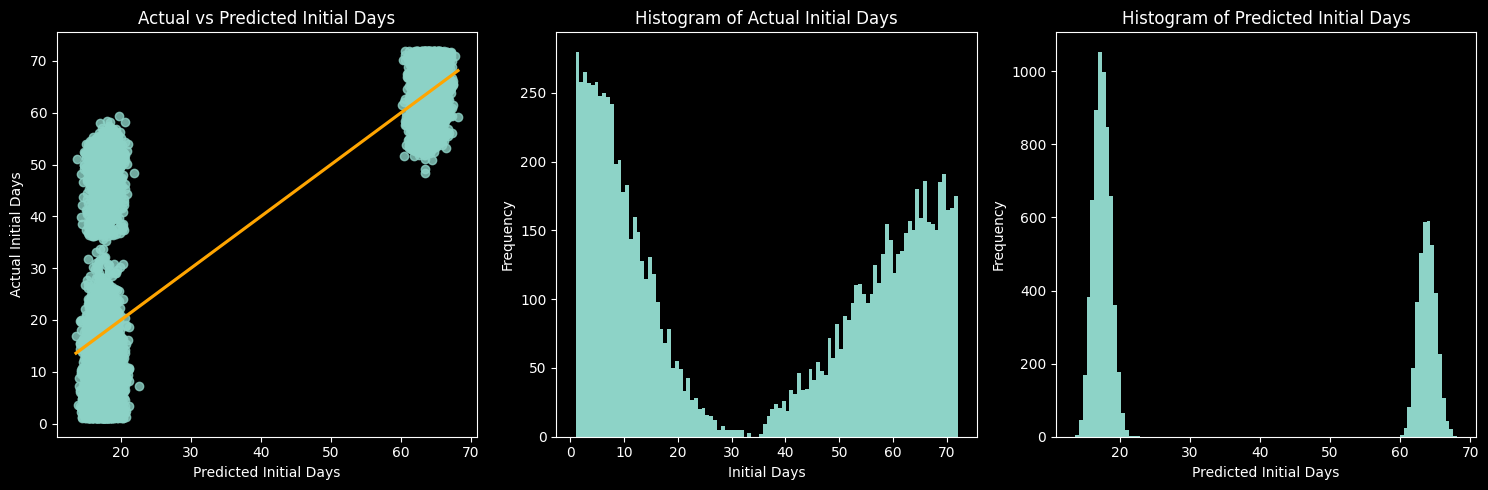

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot actual vs predicted initial days
sns.regplot(x=predictions, y=Y, fit_reg=True, line_kws={'color':'orange'}, ax=axes[0])
axes[0].set_xlabel('Predicted Initial Days')
axes[0].set_ylabel('Actual Initial Days')
axes[0].set_title('Actual vs Predicted Initial Days')

# Plot histogram of actual values
axes[1].hist(Y, bins=100)
axes[1].set_xlabel('Initial Days')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Actual Initial Days')

# Plot histogram of predicted values
axes[2].hist(predictions, bins=100)
axes[2].set_xlabel('Predicted Initial Days')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of Predicted Initial Days')

plt.tight_layout()
plt.show()


- The plot of `Actual vs Predicted days` seems to miss much of the data in the middle, predicting at lower and higher values. The `actual Initial Days` histogram again shows it's bimodal distribution, suggesting two distinct groups or patterns within the data. The `predicted Initial Days` histogram clearly shows a large range of missing values in the middle, and is heavily concentrated at the low and high ends of the range.

In [99]:
# calculate RSE
mse = model.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.792044580624435


## Initial Model Fit:

- The R-squared is 0.726, suggesting that approximately 72.6% of the variability in `Initial_days` may be explained by the model, which in combination with the almost identical Adj. R-squared of 0.725 indicating a good fit with initial model.
- The F-statistic is 714.14 with a Prob (F-statistic) of 0.00, *suggesting* that the model is statistically significant overall.
- The AIC 8.090e+04 and BIC 8.117e+04 are very similar, suggesting suggests that both are close in their evaluation of model complexity. These will be re-examined in the reduced model to see if they are lowered. 
- Residual Standard Error calculation (RSE): 13.79 `Initial_days` ranges from 1 to 72 days. An RSE of 13.79 days represents over 19% (13.792 / 72 * 100) of the total range. This suggests that, on average, the model's predictions for length of stay can deviate from the actual values by up to 13.792 days. This seems significant in this context and indicates room for improvement.

Variables.
Some predictor variables have high t-values and low p-values (P>|t|), indicating that they are statistically significant. Of note is the `ReAdmis` feature, it has a very low p-value and a highly significant coefficient (46.4505), suggesting a strong association with `Initial_days`
However, variables such as Children, Age, Income, and others have high p-values, indicating that they might not be significant predictors of `Initial_days` in the presence of other variables.
The const coefficient (y-intercept) is 19.5835, which represents the expected value of `Initial_days` when all other predictors are at zero.
It is also important to note the values of the coefficients for the predictors. Larger values can suggest a more important role for the predictor in the model. For example, the coefficient for `ReAdmis` is 46.4505, which means that for every unit increase in `ReAdmis`, the expected value of `Initial_days` increases by 46.4505 units, holding all other predictors constant. This is a large coefficient compared to others, indicating a strong relationship between `ReAdmis` and `Initial_days`. 

- Overall, even though there are some summary statistics points to a reliable model, we should be skeptical with the warning about potential multicollinearity, and the plot of the actual vs predicted values not accounting for much of the data. There are several things we should check. 

Issues:
The note on multicollinearity "[2] The condition number is large, 8.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems." indicates that there might be high correlation between some predictors. This needs to be investigated. Checking the residuals and Variance inflation factor (VIF) analysis can help to identify and highly correlated predictors.

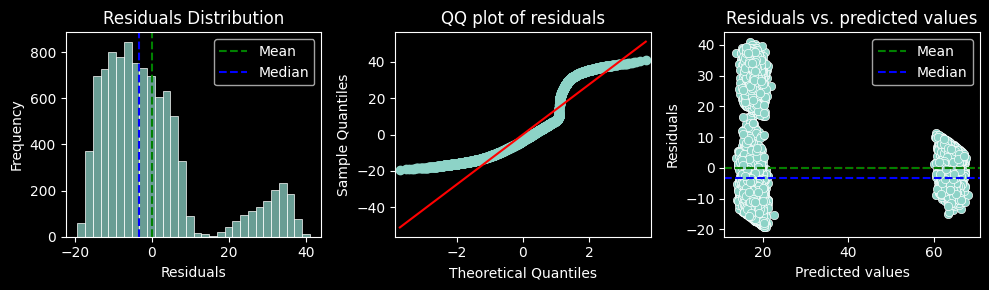

In [100]:

residuals = model.resid
# Plot the residuals
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# reesiduals Dist
sns.histplot(residuals, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# mean and median lines to the histogram
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[0].axvline(x=mean_residuals, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals")
axes[2].set_title("Residuals vs. predicted values")

# mean and median lines 
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[2].axhline(y=mean_residuals, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()


- Ideally, one would like to see a normal distribution centered around zero for the residual distribution, but this **histogram** indicates a slightly bimodal distribution that is skewed to the right, with a tail that grows slightly positive values. Hoever, the mean is in fact around 0, which presents and interesting challenge.

- The **Q-Q plot** shows that the residuals are not normally distributed, as the points do not fall along the straight line. This plot required research to interpret as I was not familiar with it. From https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html: "*The points in Q-Q plot then cross below the blue line indicating that the actual quantiles that are close to zero are farther from zero than they should be theoretically. At the center of the theoretical distribution there are no data in the actual dataset, and therefore there is no point in the Q-Q plot at (0, 0). The upper half of the Q-Q plot is a reflection across X and Y of the bottom half.*" The author also suggest this is the results of a residual distribution that is similar to the one I have. Additionally, the center of the theoretical distribution indeed did not have any data points as mentioned above.

- According to The residuals (errors) should be scattered randomly above and below the zero line across the entire range of predicted value and There should be no discernible pattern in the scatter plot of residuals. This is not the case in my scatter plot of residuals. Indicating that the model is not a good fit for the data.

- VIF analysis will be used to identify highly correlated predictors. 

In [101]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,const,319.858939
20,S_T_Admission,2.213926
21,S_T_Treatment,1.894971
33,Marital_Widowed,1.631655
30,Marital_Married,1.628373
31,Marital_Never Married,1.619690
32,Marital_Separated,1.617689
22,S_T_Visits,1.608013
25,S_Hours_Treatment,1.506889
37,Initial_admin_Observation Admission,1.499497


From the VIF analysis, most variables have VIF values well below 5, indicating no significant multicollinearity among them, which is surprising given the message from the model summary: *"[2] The condition number is large, 8.89e+05. This might indicate that there are strong multicollinearity or other numerical problems."* The highest VIF values observed for `S_T_Admission`, `S_T_Treatment`, and `marital` status categories, but even these do not exceed the threshold of 5, suggesting moderate correlation at most. 

Given the generally low VIF values, the summary statistics mentioned above the suggest a good model fit, the residuals and Q-Q plots, and the actual and predicted values, something less obvoius must be wrong with the initial model. It is also important to keep in mind the bimodal distribution of the actual `Initial_days` values, which may be contributing to the model's poor performance due to the violation of the assumption of normality.

One option is to try to transform the `Initial_days` variable to make it more normally distributed. This could involve taking the log of the variable, or splitting the data into two groups based on the bimodal distribution and creating separate models for each group. However, this would likely be complex at this point in the process and may not be necessary if a reduced model can be created that performs better than the initial model. Therefore, before that is attempted, I will employ what *domain knowledge* I have regarding the variable and use a *correlation matrix* to help identify pairwise relationships between the independent variable. In this context, perhaps a better model can be created by removing some of the predictors that are not significantly associated with `Initial_days` and may be contributing to the model's poor performance.




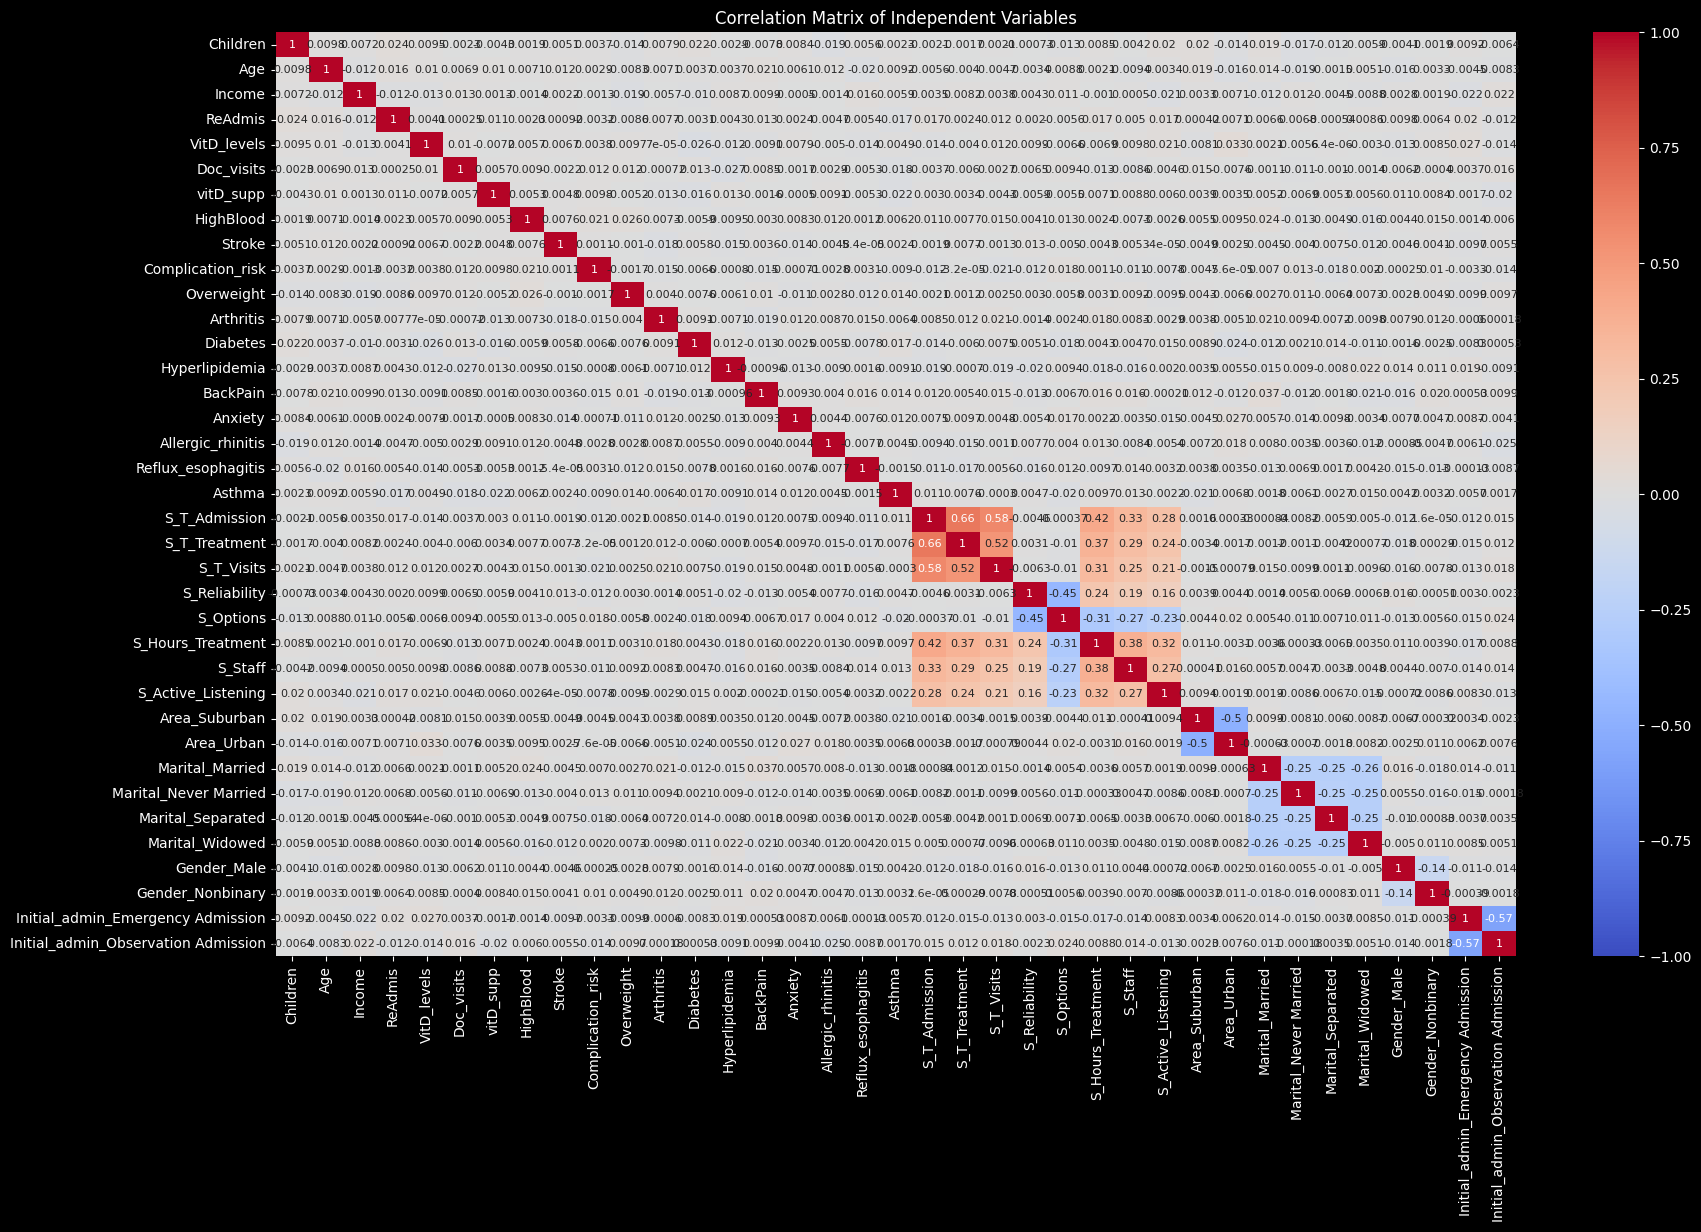

In [102]:
# assign independent variables
corr_matrix = df.drop('Initial_days', axis=1).corr()

plt.figure(figsize=(20, 12))

# correlation matrix with  values and adjusted font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8}, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Independent Variables')
plt.show()


- The correlation matrix shows that most of the variables that contain any correlation wit each other are the survey items, marital status, area, and initial admission. These would be interesting to explore further but in the context of this analyst, are not as useful as the other predictors which are largely health and biological factors and importantly, readmission status. The survey items are likely to be highly correlated with each other, and subjective feedback worthy of their own separate analyses, but here may be getting in the way of the model.Marital status, in my personal experience, has never been a factor health care providers consider except when contacting family members. I feel that these are good candidates for removal from the model. 

In [103]:
df = df.drop(['S_T_Admission', 'S_T_Treatment', 'Marital_Widowed', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'S_T_Visits', 'S_Hours_Treatment', 'S_Reliability', 'S_Staff','S_Options', 'Area_Urban','Initial_admin_Observation Admission', 'S_Active_Listening', 'Area_Suburban','Initial_admin_Emergency Admission'], axis=1)
df.head().transpose()

CaseOrder,1,2,3,4,5
Children,1.00,3.00,3.00,0.00,1.00
Age,53.00,51.00,53.00,78.00,22.00
Income,86575.00,46805.00,14370.00,39741.00,1209.00
ReAdmis,0.00,0.00,0.00,0.00,0.00
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6.00,4.00,4.00,4.00,5.00
vitD_supp,0.00,1.00,0.00,0.00,2.00
HighBlood,1.00,1.00,1.00,0.00,0.00
Stroke,0.00,0.00,0.00,1.00,0.00
Complication_risk,2.00,3.00,2.00,2.00,1.00


In [104]:
df.to_csv('medical_transformed_drop1.csv', index='CaseOrder')

In [105]:
# read in the new csv file
df = pd.read_csv('medical_transformed_drop1.csv', index_col=0)

In [106]:
X = df.drop(['Initial_days'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
predictions = model_2.predict(X)
residuals_2 = model_2.resid
model_summary_2 = model_2.summary()
model_summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:00:43   Log-Likelihood:                -40437.
No. Observations:               10000   AIC:                         8.092e+04
Df Residuals:                    9978   BIC:                         8.108e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.1671      1.574     12.816      0.000      17.082      23.252
Children               0.0302      0.064      0.473      0.636      -0.095       0.156
Age                    0.0034      0.007      0.511      0.610      -0.010       0.017
Income             -2.567e-06   4.85e-06     -0.529      0.597   -1.21e-05    6.94e-06
ReAdmis               46.4258      0.287    161.793      0.000      45.863      46.988
VitD_levels           -0.0904      0.069     -1.319      0.187      -0.225       0.044
Doc_visits            -0.1729      0.132     -1.307      0.191      -0.432       0.086
vitD_supp              0.2930      0.220      1.332      0.183      -0.138       0.724
HighBlood             -0.4396      0.281     -1.563      0.118      -0.991       0.112
Stroke                -0.1677      0.346     -0.485      0.628      -0.846       0.511
Complication_risk     -0.3983      0.189     -2.103      0.035      -0.770      -0.027
Overweight            -0.1958      0.305     -0.643      0.520      -0.793       0.401
Arthritis              0.6633      0.289      2.298      0.022       0.098       1.229
Diabetes               0.0037      0.310      0.012      0.990      -0.604       0.612
Hyperlipidemia        -0.4339      0.293     -1.483      0.138      -1.007       0.140
BackPain               0.3146      0.281      1.119      0.263      -0.237       0.866
Anxiety                0.5385      0.296      1.819      0.069      -0.042       1.119
Allergic_rhinitis      0.3978      0.283      1.406      0.160      -0.157       0.952
Reflux_esophagitis     0.3974      0.281      1.415      0.157      -0.153       0.948
Asthma                 0.0539      0.305      0.177      0.860      -0.544       0.652
Gender_Male           -0.0881      0.280     -0.315      0.753      -0.636       0.460
Gender_Nonbinary      -0.2433      0.965     -0.252      0.801      -2.135       1.649
==============================================================================
Omnibus:                     1977.930   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.405
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       4.007   Cond. No.                     5.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# calculate RSE
mse = model_2.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.816250934091325


- The R-squared went from 0.726 to 0.725 
- Adj. R-squared went from 0.725 to 0.724
- The F-statistic went from 714.14 with a Prob (F-statistic) of 0.0 to 1314 with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a better fit than the previous model.
- The AIC and BIC went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 are very similar to the previous model.
- Residual Standard Error calculation (RSE): 13.79 to 13.8, almost unchanged
- The condition number went from 8.88e+05 to 5.64e+05 which is a significant improvement, suggesting that the multicollinearity is less of an issue in this model. But still the condition number is high, so multicollinearity may still be a problem.


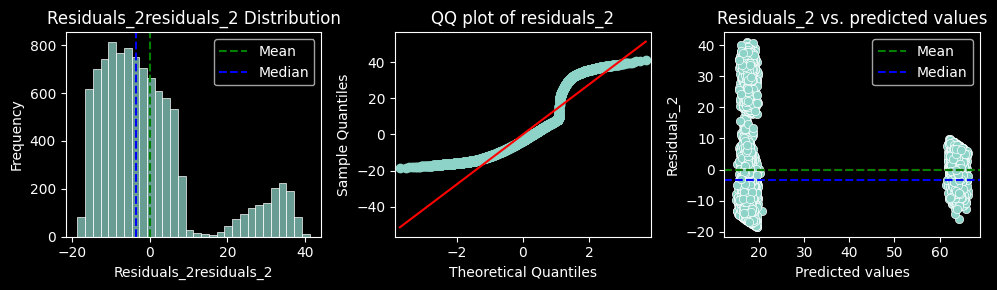

In [108]:
# Calculate the residuals_2
residuals_2_2 = model_2.resid

# Plot the residuals_2
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# iduals_2 Distribution
sns.histplot(residuals_2, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals_2residuals_2')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals_2residuals_2 Distribution')

#mean and median lines 
mean_residuals_2 = residuals_2.mean()
median_residuals_2 = residuals_2.median()
axes[0].axvline(x=mean_residuals_2, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals_2, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot
sm.qqplot(residuals_2, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals_2")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals_2, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("Residuals_2")
axes[2].set_title("Residuals_2 vs. predicted values")

# Add mean and median lines 
mean_residuals_2 = residuals_2.mean()
median_residuals_2 = residuals_2.median()
axes[2].axhline(y=mean_residuals_2, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals_2, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

- Not much has changed in our residual plots. Although our model is slightly improved according to the F-statistic, the R-squared and the condition number, the residual plots are still showing some patterns that suggest that the model is not capturing all the information in the data.

- Let's check VIF values for each of the predictors again to see if we gain ant new insights.


In [109]:
# perform VIF analysis to check for multicollinearity
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif.sort_values(by='VIF', ascending=False)


,variables,VIF
0,const,129.727015
20,Gender_Male,1.022089
21,Gender_Nonbinary,1.021966
15,BackPain,1.003004
13,Diabetes,1.002739
2,Age,1.002475
14,Hyperlipidemia,1.002397
19,Asthma,1.002384
11,Overweight,1.002341
18,Reflux_esophagitis,1.002326


- The VIF values for the predictors are all essentially 1. 
- Given this information, re-examining the p-values of the predictors and their coefficients, we can eliminate the predictors with the highest p-values and lower coefficients  to see if that improves the model. Here we have to be careful, because predictors with high p-values may still be important for the model. Examining the p-values and the coefficients together, 

- After reviewing p-values and coefficients, I am choosing to remove based on coefficient as it is associated with higher p-values. 
- Eliminate those variables with `coefficients less than an absolute value of 0.4`.

In [110]:
# statistically significant variables
significant_vars = model_2.params[model_2.params.abs() > 0.4].index.tolist()

# Remove 'const' from the list
if 'const' in significant_vars:
    significant_vars.remove('const')

print('Significant variables:', significant_vars)

Significant variables: ['ReAdmis', 'HighBlood', 'Arthritis', 'Hyperlipidemia', 'Anxiety']


In [111]:
# Create a reduced model with only significant variables above
X_reduced = X[significant_vars]

# Fit the OLS model with reduced variables
model_reduced = sm.OLS(Y, sm.add_constant(X_reduced)).fit()

# Print the summary of the reduced model
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5252.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:02:08   Log-Likelihood:                -40445.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9994   BIC:                         8.095e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.3266      0.269     64.387      0.000      16.799      17.854
ReAdmis           46.4413      0.287    161.990      0.000      45.879      47.003
HighBlood         -0.4551      0.281     -1.619      0.105      -1.006       0.096
Arthritis          0.6742      0.288      2.338      0.019       0.109       1.239
Hyperlipidemia    -0.4176      0.292     -1.429      0.153      -0.991       0.155
Anxiety            0.5454      0.296      1.843      0.065      -0.035       1.125
==============================================================================
Omnibus:                     1986.555   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3396.713
Skew:                           1.335   Prob(JB):                         0.00
Kurtosis:                       4.013   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# calculate RSE
mse = model_reduced.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 13.816762081780023


In [113]:
# new residual check and assign
residuals_reduced = model_reduced.resid
residuals_reduced

CaseOrder
1        -7.501182
2        -1.741505
3       -12.101505
4       -16.290821
5       -15.659016
           ...    
9996     34.143050
9997      4.683002
9998      6.291788
9999     -0.407851
10000     6.825491
Length: 10000, dtype: float64

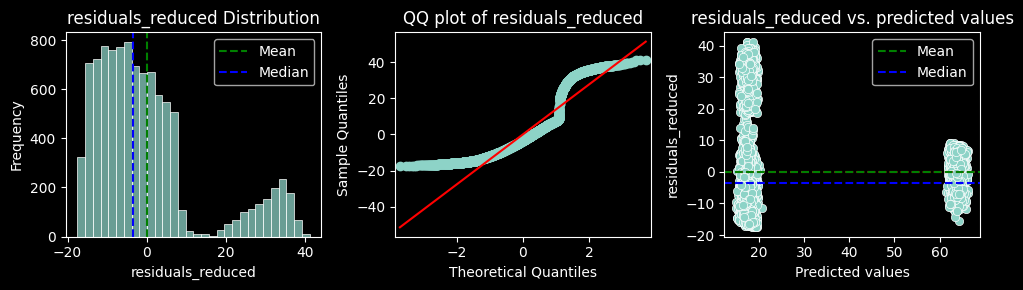

In [114]:
# Plot the residuals_reduced
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# residuals_reduced Distribution
sns.histplot(residuals_reduced, bins=30, ax=axes[0])
axes[0].set_xlabel('residuals_reduced')
axes[0].set_ylabel('Frequency')
axes[0].set_title('residuals_reduced Distribution')

#  mean and median lines  the histogram
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[0].axvline(x=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals_reduced
sm.qqplot(residuals_reduced, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals_reduced")

plt.axhline(y=0, color='red', linestyle='--') 
sns.scatterplot(x=predictions, y=residuals_reduced, ax=axes[2])
axes[2].set_xlabel("Predicted values")
axes[2].set_ylabel("residuals_reduced")
axes[2].set_title("residuals_reduced vs. predicted values")

# Add mean and median 
mean_residuals_reduced = residuals_reduced.mean()
median_residuals_reduced = residuals_reduced.median()
axes[2].axhline(y=mean_residuals_reduced, color='green', linestyle='--', label='Mean')
axes[2].axhline(y=median_residuals_reduced, color='blue', linestyle='--', label='Median')
axes[2].legend()

plt.tight_layout()
plt.show()

- ### D3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.

# Reduced model
- The R-squared went from 0.726 to 0.725 to `0.724`
- Adj. R-squared went from 0.725 to 0.724 to `0.724` as well.
- The F-statistic went from 714.14 to 1314 to `5252` all with a Prob (F-statistic) of 0.0. The f-statistic increase suggests that the model is a much better fit than the previous model.
- The AIC and BIC went from 8.090e+04 and 8.117e+04 to AIC 8.092e+04 and BIC 8.107e+04 to `AIC 8.090e+04` and `BIC 8.095e+04`, very close to each other.
- Residual Standard Error calculation (RSE): 13.79 to remain at `13.8` no matter the model change.
- The condition number went from 8.88e+05 to 5.64e+05 to `3.63` suggesting that the multicollinearity is less of an issue in this model. Likely helped by the remove of features.



### (ŷ) = 17.3266 + 46.4413(ReAdmis) - 0.4551(HighBlood) + 0.6742(Arthritis) - 0.4176(Hyperlipidemia) + 0.5454(Anxiety)

- **ReAdmis (46.4413)**: This coefficient is positive and the largest in magnitude. This suggests that a history of readmission (ReAdmis = 1) has the strongest positive association with the predicted outcome (ŷ). In other words, having a history of readmission is predicted to increase the value of ŷ.

- **HighBlood (-0.4551)**: This coefficient is negative. A negative coefficient indicates an inverse relationship between HighBlood and the predicted outcome. So, having high blood pressure (HighBlood = 1) is predicted to decrease the value of ŷ.

- **Arthritis (0.6742)**: This coefficient is positive, indicating a positive association between arthritis and the predicted outcome. So, having arthritis (Arthritis = 1) is predicted to increase the value of ŷ.

- **Hyperlipidemia (-0.4176)**: Similar to HighBlood, this coefficient is negative. So, having hyperlipidemia (high cholesterol) is predicted to decrease the value of ŷ.

- **Anxiety (0.5454)**: This coefficient is positive, indicating a positive association between anxiety and the predicted outcome. So, having anxiety (Anxiety = 1) is predicted to increase the value of ŷ.


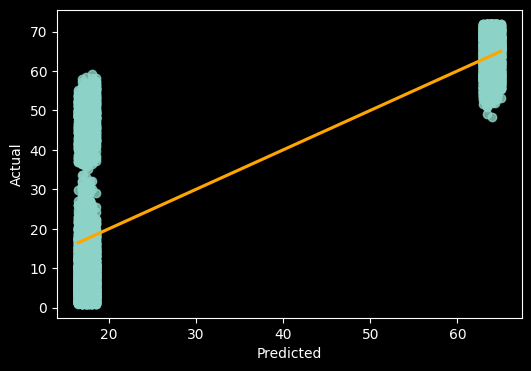

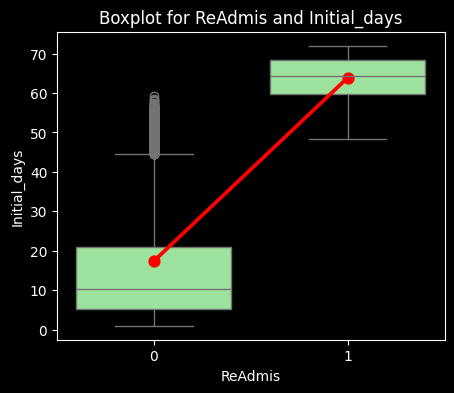

In [115]:

predictions_reduced = model_reduced.predict(sm.add_constant(X_reduced))
actual_vs_predicted = pd.DataFrame({'Actual': Y, 'Predicted': predictions_reduced})
# Plot the actual vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x='Predicted', y='Actual', data=actual_vs_predicted, fit_reg=True, line_kws={'color':'orange'})
plt.show()

#boxplot of the of initial_days and readmis
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='ReAdmis', y='Initial_days', color='lightgreen')
sns.pointplot(data=df, x='ReAdmis', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Boxplot for ReAdmis and Initial_days')
plt.show()

# Conclusion


-   This project was a remarkable learning experience, shaped significantly by the guidance of Dr. Straw and Dr. Middleton's advice. Dr. Straw indicated that the project would force tough decisions, highlighting the absence of standout models and the essential nature of hard choices. Dr. Middleton emphasized the importance of casting a wide net in selecting variables for the initial model. Following their advice, I embraced the challenge of making difficult decisions and applied a broad approach in my variable selection.

-   As I reached the project's conclusion, I recognized possible mistakes and oversights along the way. Despite the urge to correct these errors, I opted to keep them, valuing the learning process over the creation of a flawless model as well as the reality of deadlines. This provides a blueprint of my thinking, offering a reminder of overlooked aspects crucial for future projects, particularly in the Multiple Linear Irrigation case study.


### G & H: References


- Datacamp. (2023, December 12). D207 - Exploratory Data Analysis. Retrieved from https://app.datacamp.com/learn/custom-tracks/custom-d207-exploratory-data-analysis 

- Statology. (n.d.). *The Five Assumptions of Multiple Linear Regression*. Statology. Retrieved March 10, 2024, from www.statology.org/multiple-linear-regression-assumptions/

- GeeksforGeeks. (n.d.). Interpreting the results of linear regression using OLS summary. Retrieved March 24, 2024, from https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

- Indhumathy Chelliah. (2021, August 3). Everything to know about residuals in linear regression. Retrieved March 24, 2024, from https://indhumathychelliah.com/2021/08/03/everything-to-know-about-residuals-in-linear-regression/

- Kross, S. (2016, February 29). A Q-Q Plot Dissection Kit. Retrieved March 24, 2024, from https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html

- LinkedIn Learning. (n.d.). How do you transform a skewed bimodal data set into a normal distribution? Retrieved March 24, 2024, from https://www.linkedin.com/advice/0/how-do-you-transform-skewed-bimodal-data-set-normal

- Manl, F. (n.d.). Intermediate Regression with statsmodels in Python. Retrieved March 24, 2024, from https://github.com/FraManl/DataCamp/blob/main/Intermediate%20Regression%20with%20statsmodels%20in%20Python.ipynb

- Python Graph Gallery. (n.d.). Retrieved March 24, 2024, from https://python-graph-gallery.com/

- ResearchGate. (n.d.). Normal probability plots. Retrieved March 24, 2024, from https://www.researchgate.net/figure/Normal-pro-bability-plots-a-ideal-b-heavy-tailed-distri-bution-c-light-tailed_fig1_262663278

- Statology. (n.d.). Multiple Linear Regression Assumptions. Retrieved March 24, 2024, from https://www.statology.org/multiple-linear-regression-assumptions/

- Stack Exchange. (n.d.). Multicollinearity: When individual regressions are significant but VIFs are low. Retrieved March 24, 2024, from https://stats.stackexchange.com/questions/24464/multicollinearity-when-individual-regressions-are-significant-but-vifs-are-low

- Stack Overflow. (2020, August 10). Residual standard error of a regression in Python. Retrieved March 24, 2024, from https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python

- Western Governors University. (n.d.). R or Python? Retrieved March 24, 2024, from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html

- YouTube. (n.d.). Checking MLR Assumptions. Retrieved March 24, 2024, from https://www.youtube.com/watch?v=_XAurJJQ7jw

- Sewell, W. (2024). [PowerPoint slides on model tuning]. Western Governors University. Retrieved March 24, 2024, from https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz


(GeeksforGeeks, n.d.)
(Indhumathy Chelliah, 2021)
(Kross, 2016)
(LinkedIn Learning, n.d.)
(Manl, n.d.)
(Python Graph Gallery, n.d.)
(ResearchGate, n.d.)
(Statology, n.d.)
(Stack Exchange, n.d.)
(Stack Overflow, 2020)
(Western Governors University, n.d.)
(YouTube, n.d.)
(Sewell, 2024, slide 5)




## Software

The following software packages were used in this project:

* **pandas** pandas is a Python library providing data structures and data analysis tools.
* **numpy** NumPy is a Python library for scientific computing.
* **matplotlib** Matplotlib is a Python library for creating static, animated, and interactive visualizations.
* **seaborn** Seaborn is a Python library for statistical data visualization built on top of matplotlib.
* **statsmodels** Statsmodels is a Python library for statistical modeling and econometrics.
* **Scikit-learn**  Scikit-learn is a free machine learning library for Python.

**References**

- Python Software Foundation. (2023). Python Language Reference, version 3.9.6. Retrieved from https://www.python.org

- Scikit-Learn:
  Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830. Retrieved from https://scikit-learn.org

- Jinja2:
  Ronacher, A. (2023). Jinja2: The modern and designer-friendly templating engine for Python. Retrieved from https://jinja.palletsprojects.com/

- Matplotlib:
  Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90-95. Retrieved from https://matplotlib.org

- Statsmodels:
  Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. In *Proceedings of the 9th Python in Science Conference* (Vol. 57, p. 61). Retrieved from https://www.statsmodels.org

- Pandas:
  McKinney, W. (2010). Data Structures for Statistical Computing in Python. In *Proceedings of the 9th Python in Science Conference* (pp. 51-56). Retrieved from https://pandas.pydata.org

- NumPy:
  Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357-362. Retrieved from https://numpy.org

- Seaborn:
  Waskom, M. (2021). Seaborn: statistical data visualization. *Journal of Open Source Software, 6*(60), 3021. Retrieved from https://seaborn.pydata.org


In [2]:
# manage memory by using gc.collect() to clear memory
import gc
gc.collect()


0

# Limitations

Beware of the following with your regression analysis:

Overfitting can occur due to limited data points.

Multicollinearity occurs when high association (correlation) with other IVs.

P-values can be unreliable and coefficients swing wildly

Check for pairwise correlations and high VIF (> 10)

Tune your model with as many variables as practical. Forward, backward, stepwise
    regression based on AIC, BIC, etc.
ppoint 5 https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

# Errata n notes

I'm wrapping up task 1, and my research question is 'what factors influence the total charge a patient receives'. Total charge has a bimodal distribution that I did a log transform on which helped tremendously. Regarding my final reduced model, the RSE is pretty good, both residual normality and homoscedasticity are mostly there. Both have slight variance from expectations around the tails. For fun I decided to re run my code but filtered my data for patients staying less than a month and it improved my RSE, normality and homoscedasticity. Should I change my research question or keep it broad and just explain the limitations of outlier patients?


